In [28]:
import pickle 
import numpy as np
import functools
with open("ldbc01/ldbc01_statistic.pkl","rb+") as f:
    data_ytb = pickle.loads(f.read()) 
with open("ldbc01-naive/ldbc01_naive_statistic.pkl","rb+") as f1:
    data_ytb1 = pickle.loads(f1.read()) 

for i in range(len(data_ytb)):
    print(f"{data_ytb[i][1]} query, the max time difference is {format(np.max(data_ytb[i][2])-np.max(data_ytb1[i][2]),'.3f')} ms, the average time difference  is {format(np.mean(data_ytb[i][2]-np.mean(data_ytb1[i][2])),'.3f')} ms")

REGEX Q0 query, the max time difference is 12.991 ms, the average time difference  is 0.119 ms
RDPQ Q11 query, the max time difference is 42.087 ms, the average time difference  is 4.003 ms
RDPQ Q12 query, the max time difference is 3.411 ms, the average time difference  is 3.106 ms
RDPQ Q13 query, the max time difference is 17.470 ms, the average time difference  is 3.671 ms
RDPQ Q14 query, the max time difference is 17.139 ms, the average time difference  is 3.555 ms
RDPQ Q15 query, the max time difference is 16.987 ms, the average time difference  is 3.555 ms
REGEX Q1 query, the max time difference is 15.799 ms, the average time difference  is 0.296 ms
RDPQ Q21 query, the max time difference is -9.886 ms, the average time difference  is 3.379 ms
RDPQ Q22 query, the max time difference is -3.989 ms, the average time difference  is 3.195 ms
RDPQ Q23 query, the max time difference is 11.794 ms, the average time difference  is 3.402 ms
RDPQ Q24 query, the max time difference is -10973.9

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_max_comparison(path, path2, name1, name2, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(12):  # Q1-Q10
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"Q{i+1}", dtype, name, data))

    # Prepare max values for plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        plot_data.append({
            'Query': group,
            'Data Constraint': dtype,
            'Dataset': dataset_name,
            'Max': np.max(values)
        })
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = 12
    cols = 6
    rows = (num_queries + cols - 1) // cols
    plt.figure(figsize=(20, 6*rows))
    sns.set_style("whitegrid")

    for idx, query in enumerate(range(1, num_queries + 1), 1):
        ax = plt.subplot(rows, cols, idx)
        query_df = df[df['Query'] == f"Q{query}"]
        if query_df.empty:
            raise ValueError(f"No data available for Q{query}")
        # Plot max values as lines
        sns.lineplot(data=query_df, x='Data Constraint', y='Max', 
                    hue='Dataset', style='Dataset',
                    markers=True, dashes=False, ax=ax,
                    markersize=8, linewidth=2.5)
        ax.get_legend().remove() 
        
        ax.set_title(f"Max: {query}")
        ax.set_xlabel("Data Constraint")
        ax.set_ylabel("Time (ms)")
        plt.xticks(rotation=45)
        
        # Check for log scale
        max_val = query_df['Max'].max()
        min_val = query_df['Max'].min()
        if log_scale and max_val / min_val > 100:
            ax.set_yscale("log")
            ax.set_title(f"Max: {query} (log scale)")
    
    plt.suptitle(f"Maximum Running Time Comparison: {name1} vs {name2}", y=1.02)
    handles, labels = ax.get_legend_handles_labels()

    # Create single legend above all subplots
    plt.figlegend(handles, labels, loc='upper left', 
                bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'figure/{name1}-vs-{name2}-max-comparison.svg', 
                format='svg', dpi=1200, bbox_inches='tight')
    plt.show()
def plot_mean_comparison(path, path2, name1, name2, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(12):  # Q1-Q10
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"Q{i+1}", dtype, name, data))

    # Prepare mean values for plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        plot_data.append({
            'Query': group,
            'Data Constraint': dtype,
            'Dataset': dataset_name,
            'Mean': np.mean(values)
        })
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = 12
    cols = 6
    rows = (num_queries + cols - 1) // cols
    plt.figure(figsize=(20, 6*rows))
    sns.set_style("whitegrid")

    for idx, query in enumerate(range(1, num_queries + 1), 1):
        ax = plt.subplot(rows, cols, idx)
        query_df = df[df['Query'] == f"Q{query}"]
        
        # Plot mean values as lines
        sns.lineplot(data=query_df, x='Data Constraint', y='Mean', 
                    hue='Dataset', style='Dataset',
                    markers=True, dashes=False, ax=ax,
                    markersize=8, linewidth=2.5)
        ax.get_legend().remove() 
        
        ax.set_title(f"Mean: {query}")
        ax.set_xlabel("Data Constraint")
        ax.set_ylabel("Time (ms)")
        plt.xticks(rotation=45)
        
        # Check for log scale
        max_val = query_df['Mean'].max()
        min_val = query_df['Mean'].min()
        if log_scale and max_val / min_val > 100:
            ax.set_yscale("log")
            ax.set_title(f"Mean: {query} (log scale)")
    
    plt.suptitle(f"Average Running Time Comparison: {name1} vs {name2}", y=1.02)
    handles, labels = ax.get_legend_handles_labels()

    # Create single legend above all subplots
    plt.figlegend(handles, labels, loc='upper left', 
                bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'figure/{name1}-vs-{name2}-mean-comparison.svg', 
                format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

def plot_timeout_comparison(path, path2, name1, name2, timeout, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(12):  # Q1-Q10
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"Q{i+1}", dtype, name, data))

    # Prepare mean values for plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        plot_data.append({
            'Query': group,
            'Data Constraint': dtype,
            'Dataset': dataset_name,
            'TimeOut': len(list(filter(lambda x: (x/1000) > timeout, values)))
        })
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = 12
    cols = 6
    rows = (num_queries + cols - 1) // cols
    plt.figure(figsize=(20, 6*rows))
    sns.set_style("whitegrid")

    for idx, query in enumerate(range(1, num_queries + 1), 1):
        ax = plt.subplot(rows, cols, idx)
        query_df = df[df['Query'] == f"Q{query}"]

        # Plot mean values as lines
        sns.lineplot(data=query_df, x='Data Constraint', y='TimeOut', 
                    hue='Dataset', style='Dataset',
                    markers=True, dashes=False, ax=ax,
                    markersize=8, linewidth=2.5)
        ax.get_legend().remove() 
        ax.set_title(f"{query}/Timeout Threshold:{timeout}s")
        ax.set_xlabel("Data Constraint")
        ax.set_ylabel("Number of Time Out Queries")
        # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.6f}%"))
        plt.xticks(rotation=45)
        
        # # Check for log scale
        # max_val = query_df['Timeout'].max()
        # min_val = query_df['Mean'].min()
        # if log_scale and max_val / min_val > 100:
        #     ax.set_yscale("log")
        #     ax.set_title(f"Mean: {query} (log scale)")
    
    plt.suptitle(f"Timeout Comparison: {name1} vs {name2}", y=1.02)
# Get handles/labels from last subplot (they're the same for all)
    handles, labels = ax.get_legend_handles_labels()

    # Create single legend above all subplots
    plt.figlegend(handles, labels, loc='upper left', 
                bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'figure/{name1}-vs-{name2}-timeout-comparison.svg', 
                format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

def plot_compare(path1, path2, name, timeout, log=True):
    plot_max_comparison(path1, path2, f"{name}-Optimized", f"{name}-Naive", log)
    plot_mean_comparison(path1, path2, f"{name}-Optimized", f"{name}-Naive", log)
    plot_timeout_comparison(path1, path2, f"{name}-Optimized", f"{name}-Naive", timeout)



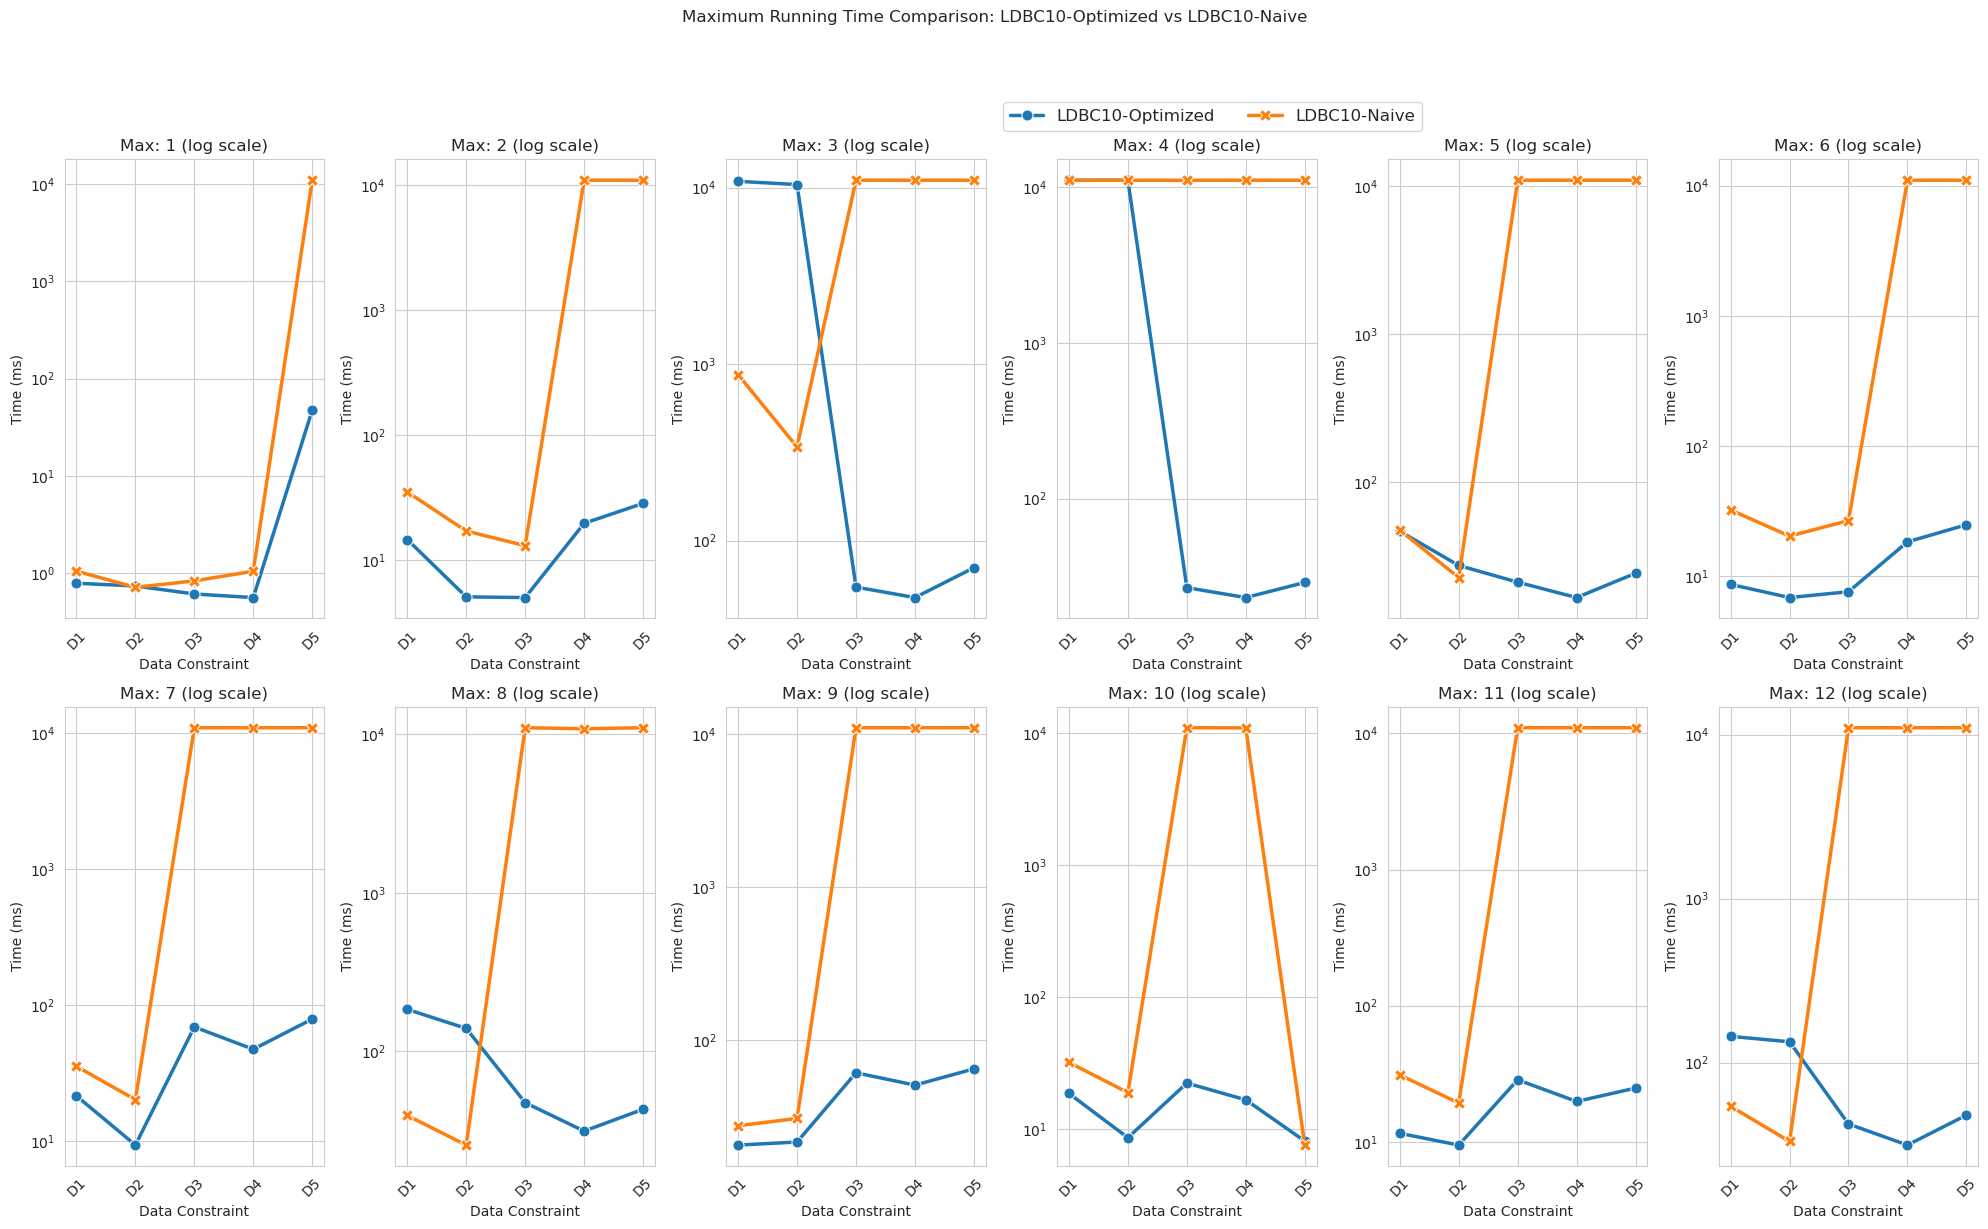

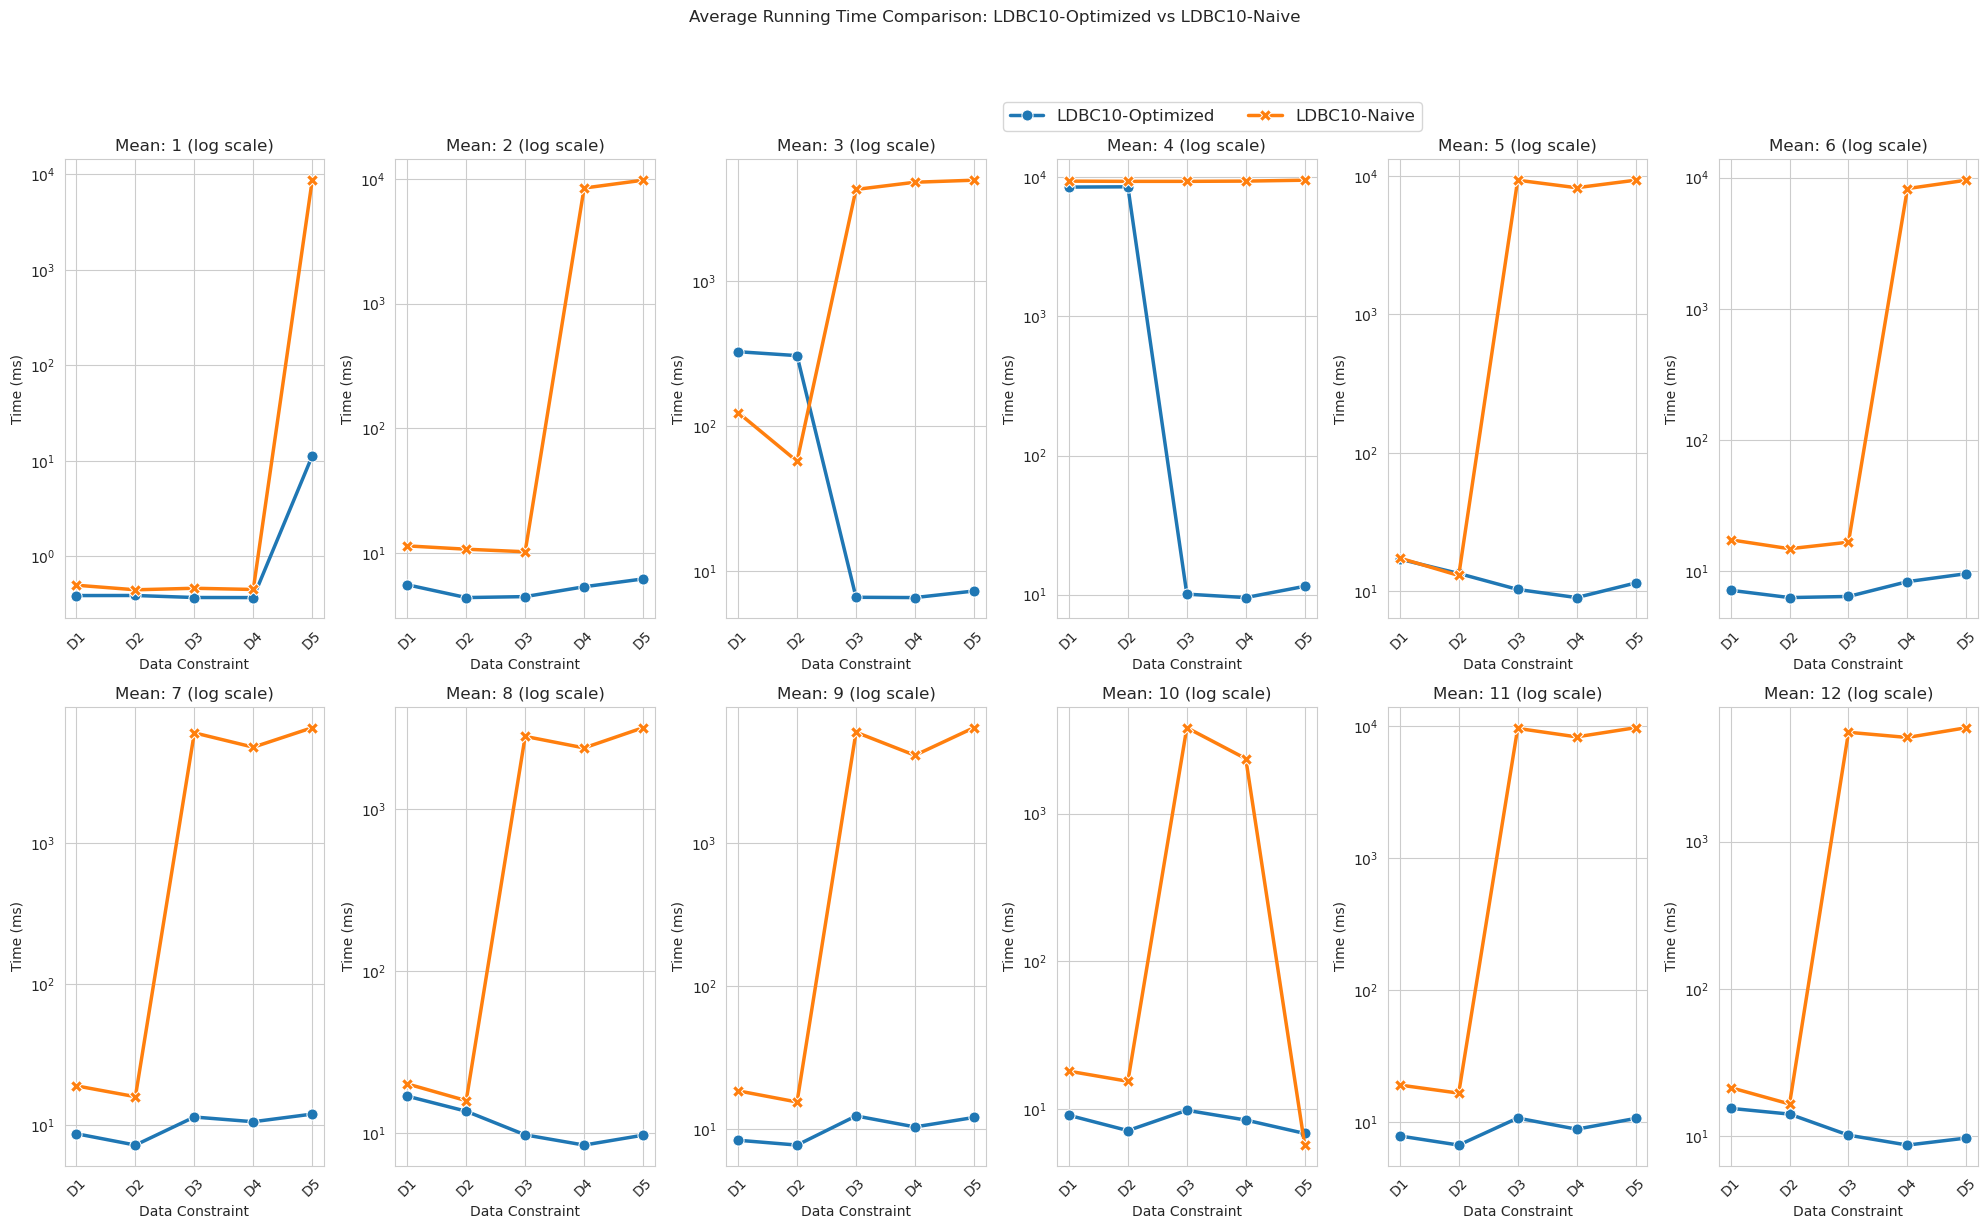

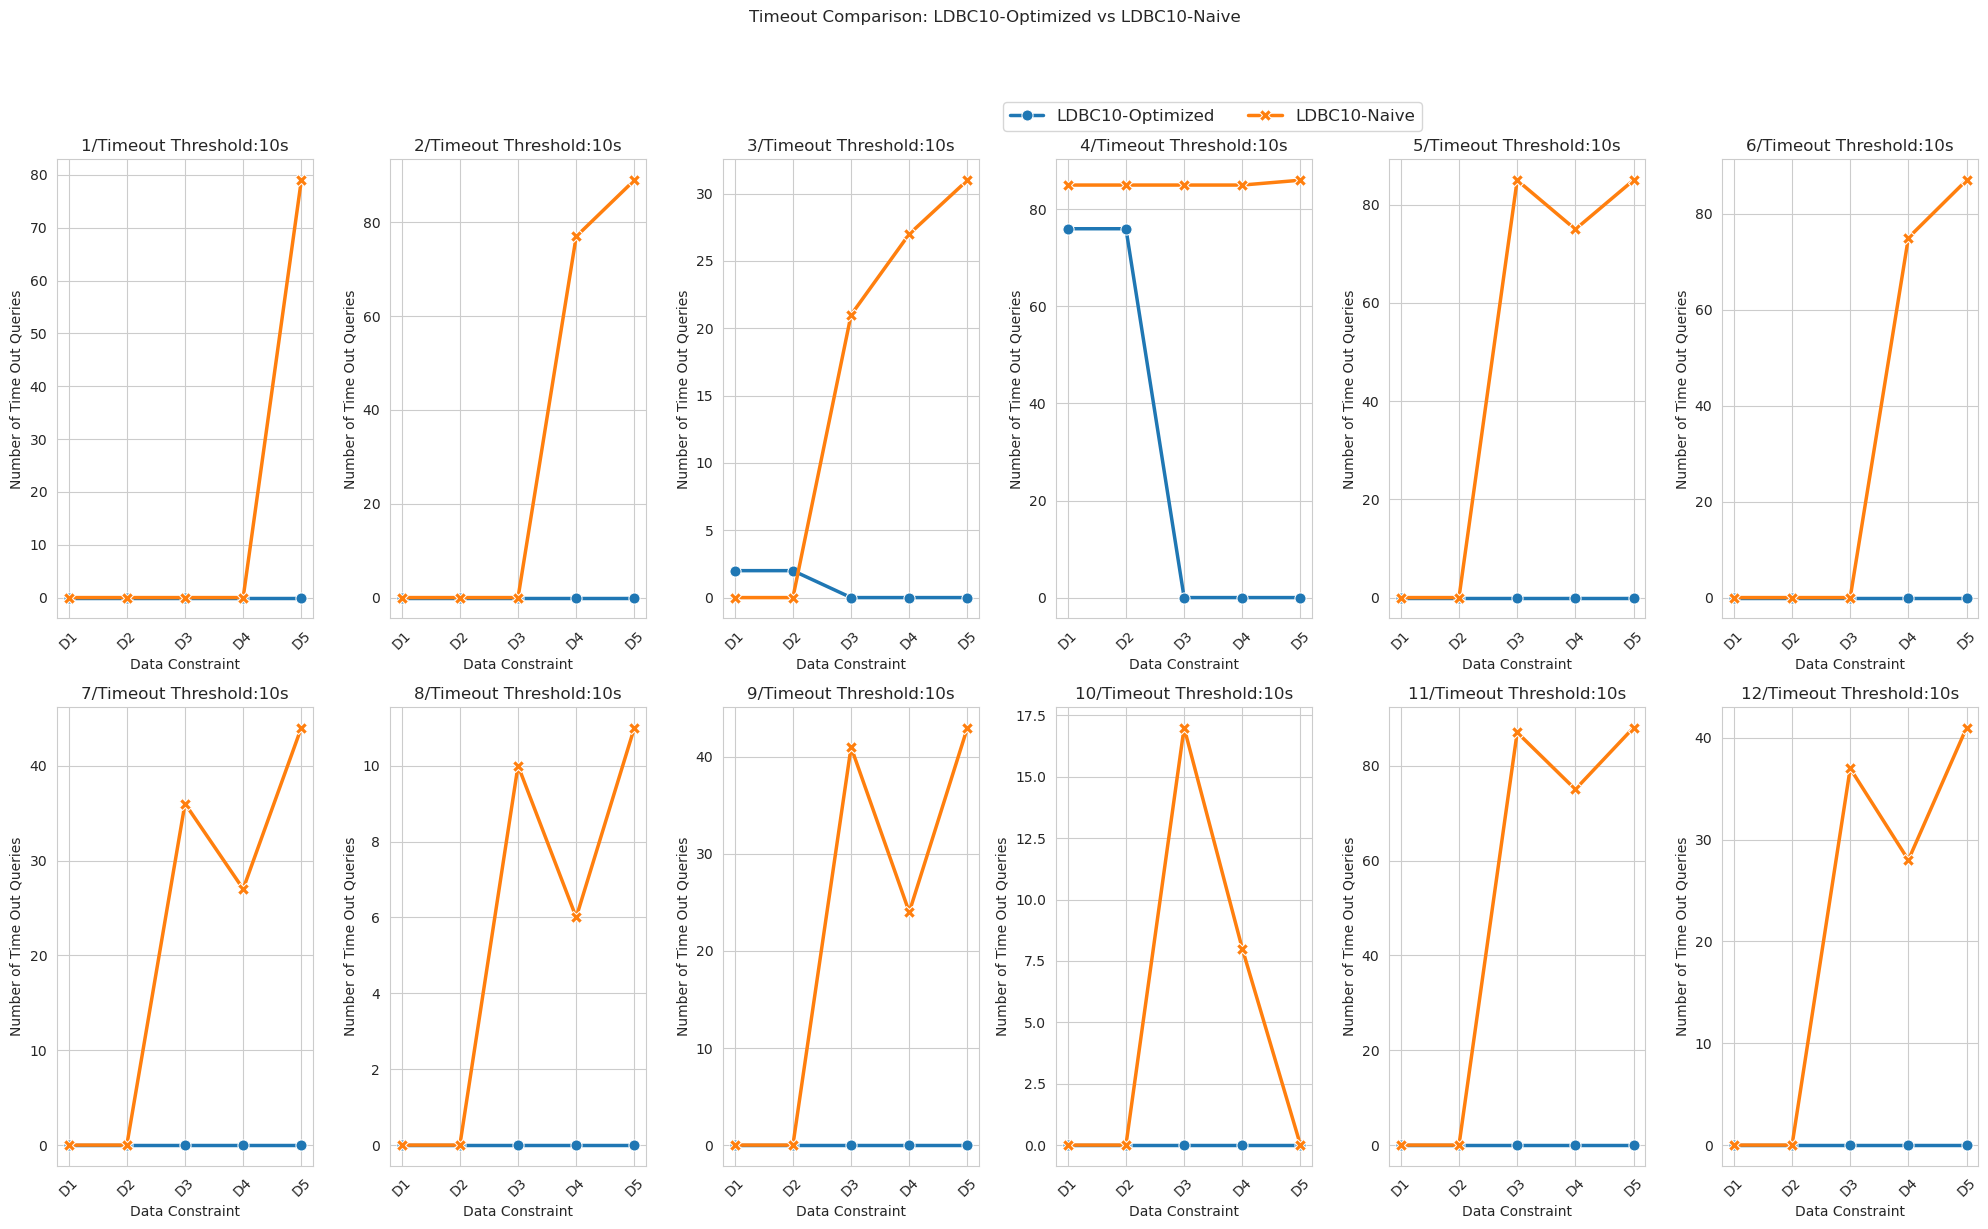

In [2]:
plot_compare("ldbc10/ldbc10_statistic.pkl", "ldbc10-naive/ldbc10_naive_statistic.pkl", "LDBC10", 10, True)

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

def plot_boxplot_with_timeout(path, path2, ds, name1="Optimized", name2="Naive", timeout=10, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(12):  # Q1-Q12
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"Q{i+1}", dtype, name, data))

    # Prepare data for box plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        for value in values:
            plot_data.append({
                'Query': group,
                'Data Constraint': dtype,
                'Dataset': dataset_name,
                'Time': value,
                'IsTimeout': (value / 1000) > timeout
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = 12
    cols = 6
    rows = (num_queries + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(24, 8*rows))
    axes = axes.flatten()  # Flatten for easier indexing
    sns.set_style("whitegrid")

    # Get current font sizes to calculate double size
    current_fontsize = plt.rcParams['font.size']
    double_fontsize = current_fontsize * 2

    for idx, query in enumerate(range(1, num_queries + 1), 1):
        ax = axes[idx-1]
        query_df = df[df['Query'] == f"Q{query}"]
        if query_df.empty:
            ax.set_title(f"No data for Q{query-1}", fontsize=double_fontsize)
            continue
        
        # Create box plots
        boxplot = sns.boxplot(data=query_df, x='Data Constraint', y='Time', 
                             hue='Dataset', ax=ax, showfliers=False,
                             palette=['skyblue', 'lightcoral'])
        
        # Add timeout threshold line
        timeout_ms = timeout * 1000  # Convert seconds to milliseconds
        ax.axhline(y=timeout_ms, color='red', linestyle='--', linewidth=3, 
                  alpha=0.8, label=f'Timeout Threshold ({timeout}s)')
        
        # Calculate and display timeout statistics with larger font
        for dataset_name in [name1, name2]:
            dataset_timeout_df = query_df[(query_df['Dataset'] == dataset_name) & (query_df['IsTimeout'])]
            timeout_count = len(dataset_timeout_df)
            total_count = len(query_df[query_df['Dataset'] == dataset_name])
            timeout_percentage = (timeout_count / total_count * 100) if total_count > 0 else 0
            
            # Add timeout count annotation with larger font
            color = 'blue' if dataset_name == name1 else 'red'
            ax.text(0.02, 0.85 - (0.1 * (list([name1, name2]).index(dataset_name))), 
                   f'{dataset_name}: {timeout_count}/{total_count} ({timeout_percentage:.1f}%)',
                   transform=ax.transAxes, verticalalignment='top',
                   color=color, fontweight='bold', fontsize=double_fontsize * 0.7)
        
        # Set titles and labels with larger font
        ax.set_title(f"Q{query-1}", fontweight='bold', fontsize=double_fontsize)
        ax.set_xlabel("", fontsize=double_fontsize)
        ax.set_ylabel("Time (ms)", fontsize=double_fontsize)
        
        # Increase tick label size
        ax.tick_params(axis='x', labelsize=double_fontsize * 0.8)
        ax.tick_params(axis='y', labelsize=double_fontsize * 0.8)
        
        plt.setp(ax.get_xticklabels(), rotation=45)
        
        # Check for log scale
        max_time_val = query_df['Time'].max()
        min_time_val = query_df[query_df['Time'] > 0]['Time'].min()  # Exclude zeros
        if log_scale and max_time_val > 0 and min_time_val > 0 and max_time_val / min_time_val > 100:
            ax.set_yscale("log")
            ax.set_title(f"Q{query-1} (log scale)", fontweight='bold', fontsize=double_fontsize)
        else:
            # Reduce distance between y-axis ticks by half for linear scale
            y_min, y_max = ax.get_ylim()
            current_ticks = ax.get_yticks()
            
            if len(current_ticks) > 1:
                current_spacing = current_ticks[1] - current_ticks[0]
                new_spacing = current_spacing / 2
                
                # Make sure we don't create too many ticks
                max_ticks = 20
                num_ticks = int((y_max - y_min) / new_spacing) + 1
                
                if num_ticks <= max_ticks:
                    new_ticks = np.arange(round(y_min / new_spacing) * new_spacing, 
                                         round(y_max / new_spacing) * new_spacing + new_spacing, 
                                         new_spacing)
                    ax.set_yticks(new_ticks)
                else:
                    # Use automatic locator if too many ticks would be created
                    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=max_ticks))

        # Remove individual legends (we'll create a global one)
        if ax.get_legend():
            ax.get_legend().remove()
    
    # Remove empty subplots if any
    for idx in range(num_queries, len(axes)):
        fig.delaxes(axes[idx])
    
    # Create comprehensive legend with much larger text
    legend_elements = [
        Patch(facecolor='skyblue', label=f'{name1}'),
        Patch(facecolor='lightcoral', label=f'{name2}'),
        Line2D([0], [0], color='red', linestyle='--', linewidth=3, 
               label=f'Timeout Threshold ({timeout}s)')
    ]
    
    fig.legend(handles=legend_elements, loc='upper center', 
               bbox_to_anchor=(0.5, 1.0), ncol=3, 
               fontsize=double_fontsize * 1.2,  # Even larger for legend
               frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig(f'figure/{ds}-{name1}-vs-{name2}-boxplot-timeout.pdf', 
                format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()

# Optional: Keep the original function for comparison
def plot_combined_comparison(path, path2, name1, name2, timeout, log_scale=True):
    # Original implementation here
    pass

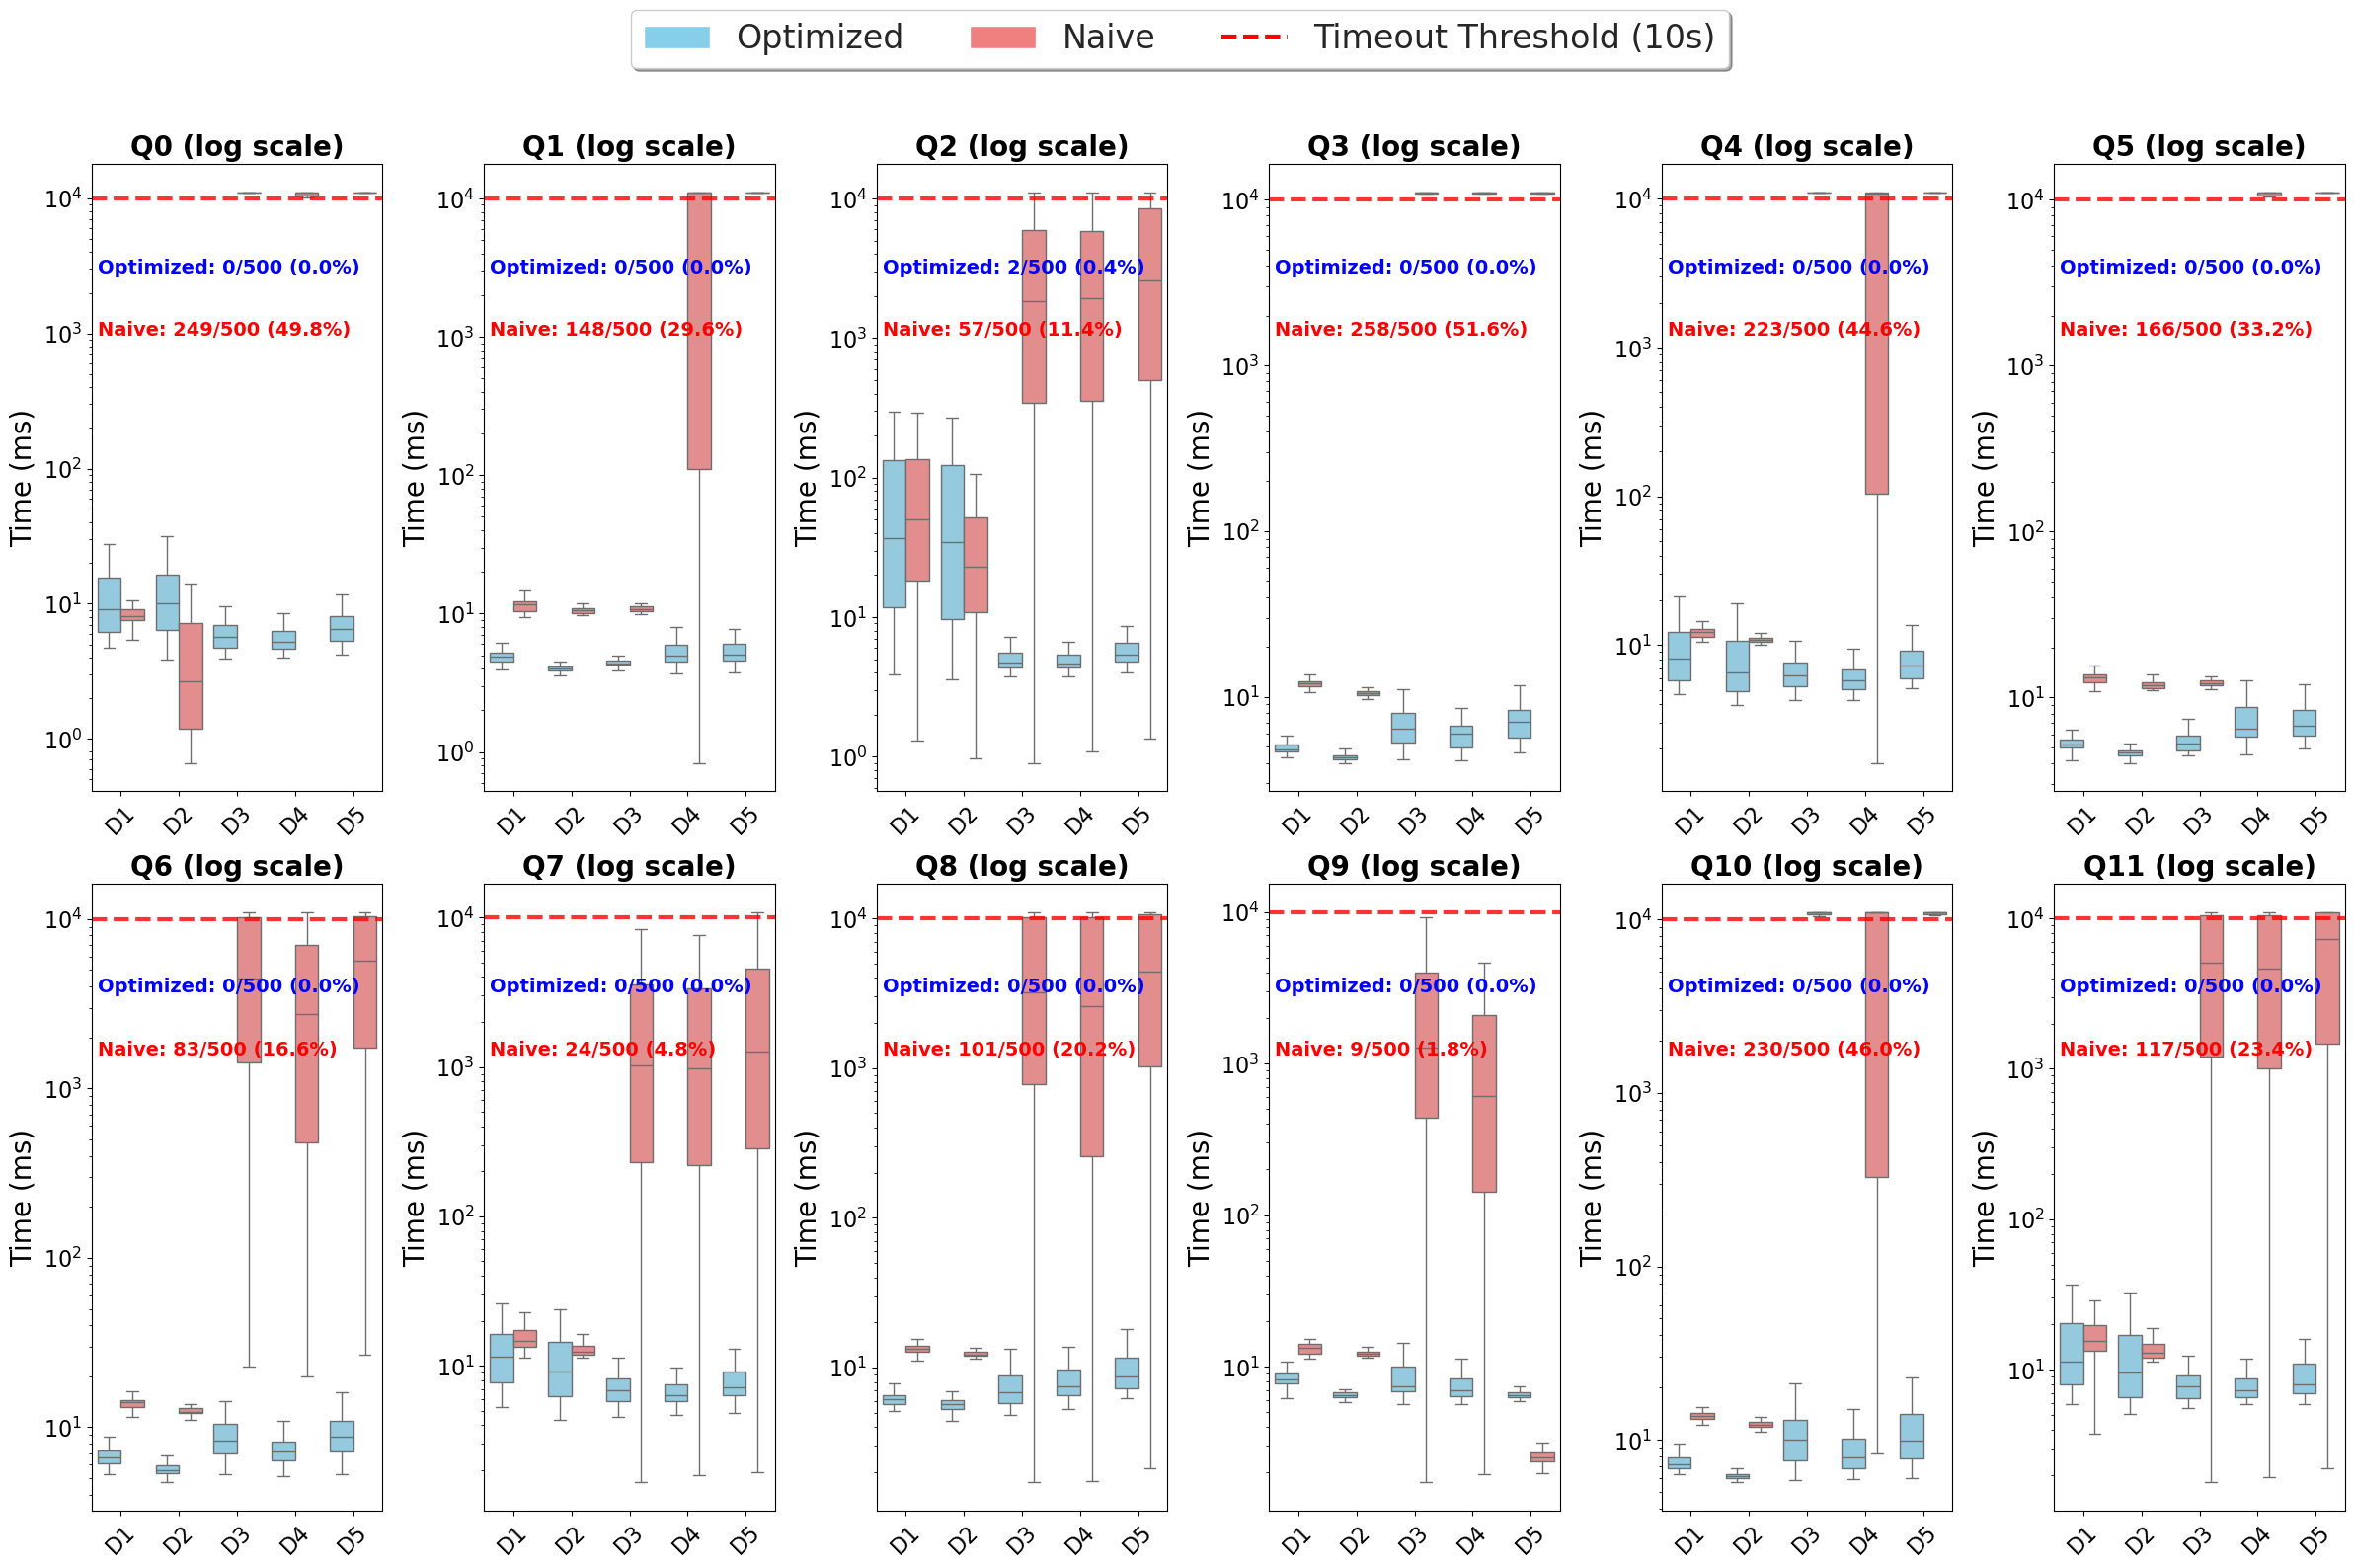

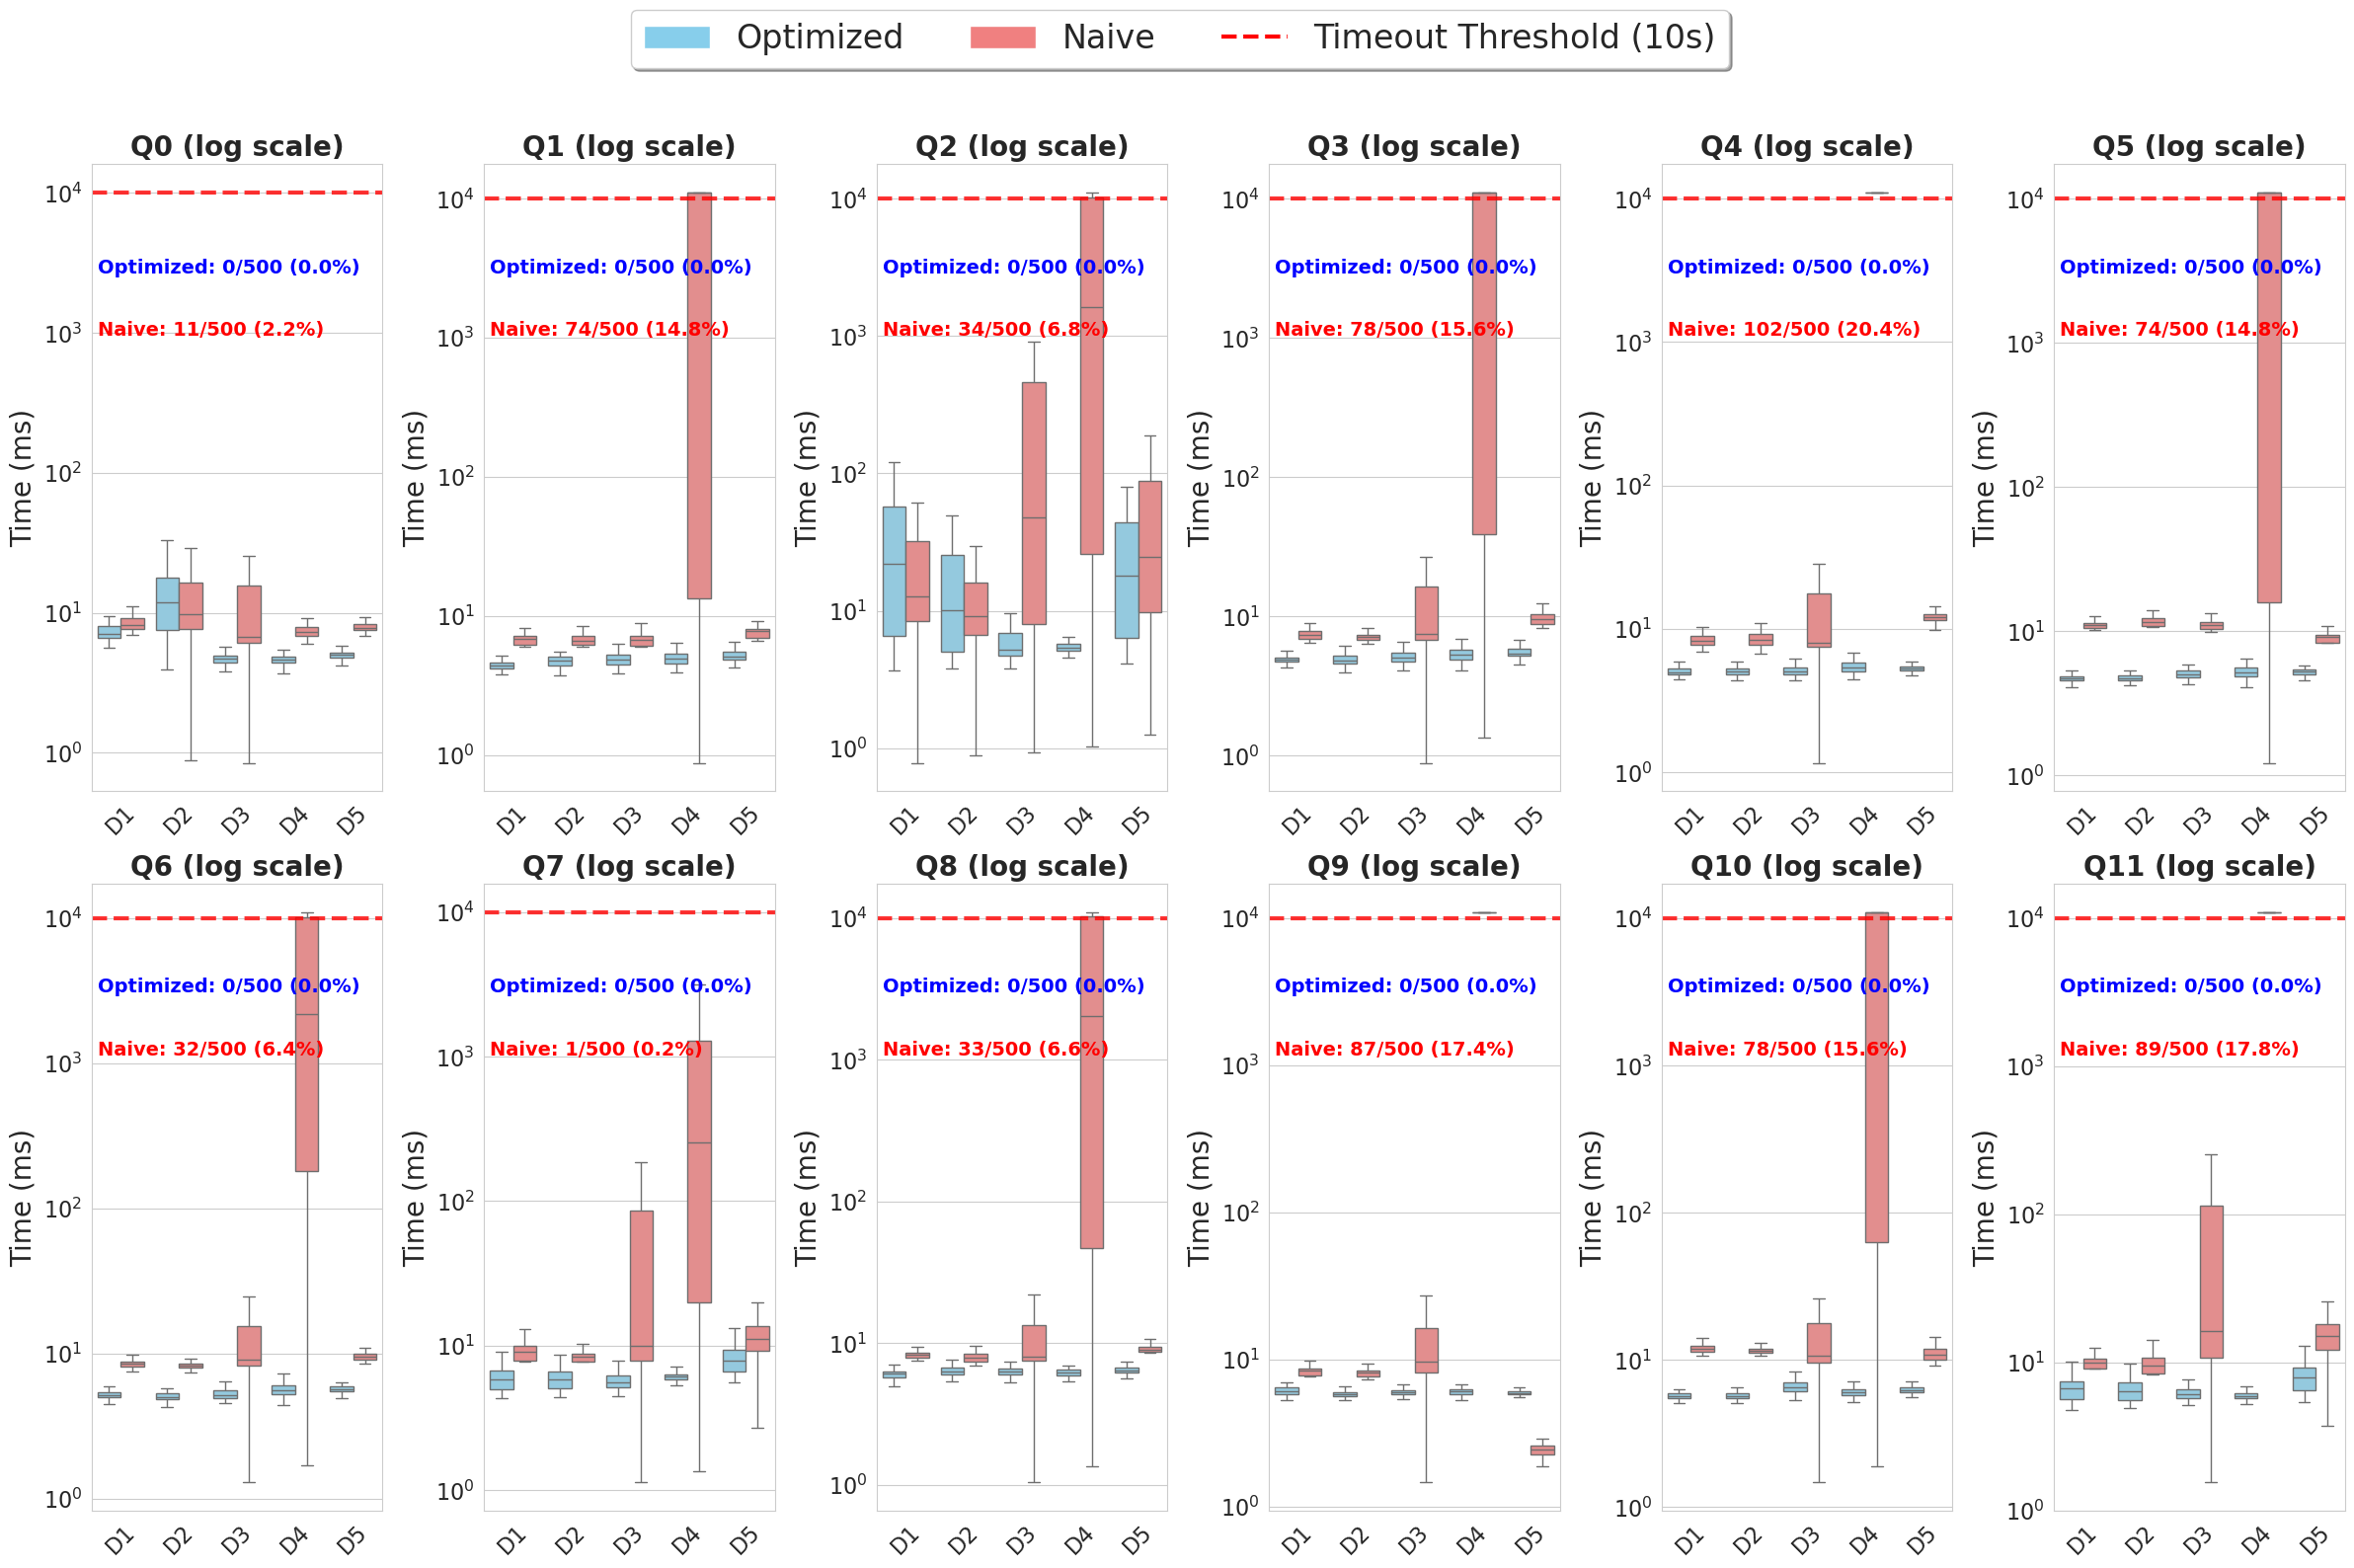

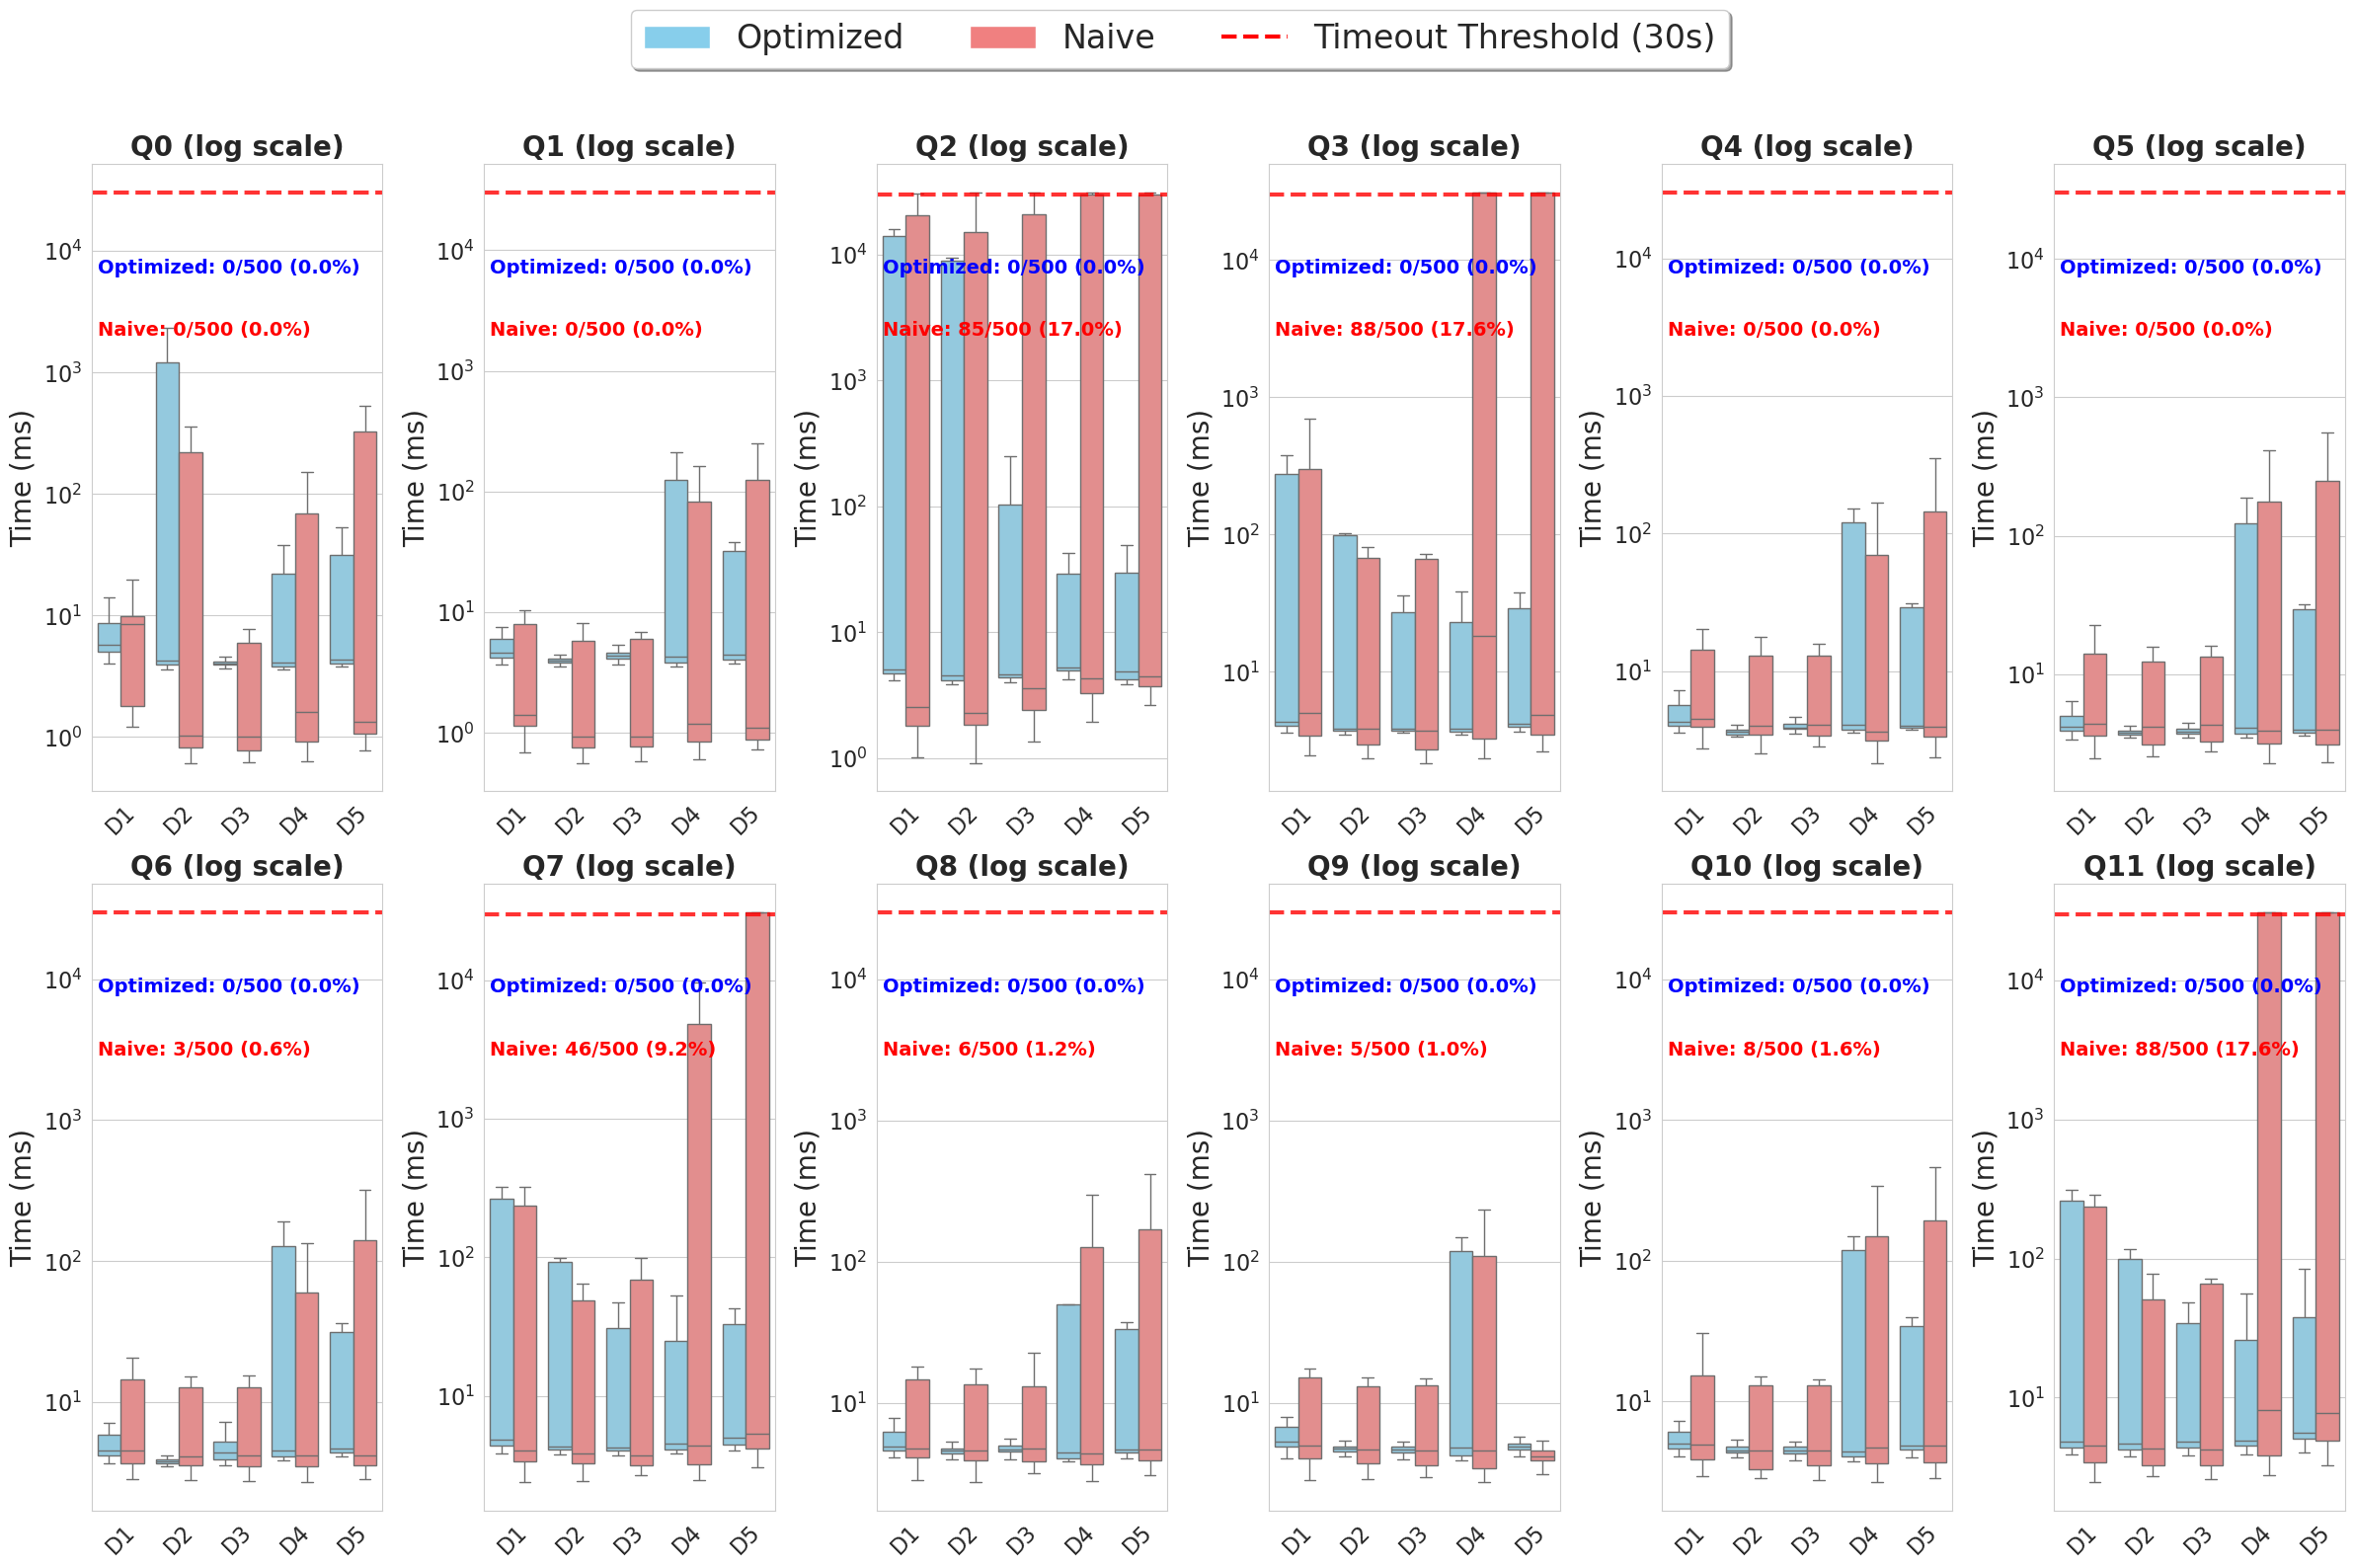

In [3]:
plot_boxplot_with_timeout("ldbc10/ldbc10_statistic.pkl", "ldbc10-naive/ldbc10_naive_statistic.pkl", ds="LDBC10", timeout=10)
plot_boxplot_with_timeout("pokec/pokec_statistic.pkl", "pokec-naive/pokec_naive_statistic.pkl", ds="Pokec", timeout=10)
plot_boxplot_with_timeout("telecom/telecom_statistic.pkl", "telecom-naive/telecom_naive_statistic.pkl", ds="Telecom", timeout=30)

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

def plot_time_distribution_by_constraint(path, path2, ds, name1="Optimized", name2="Naive", timeout=10):
    """
    Plot time distribution by data constraint complexity using box plots
    - Simple: D1, D2
    - Complex: D3, D4, D5
    """
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(12):  # Q1-Q12
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:  # Skip RPQ
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"Q{i+1}", dtype, name, data))

    # Prepare data
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        for value in values:
            plot_data.append({
                'Query': group,
                'Data Constraint': dtype,
                'Dataset': dataset_name,
                'Time': value,
                'IsTimeout': (value / 1000) > timeout
            })
    
    df = pd.DataFrame(plot_data)
    
    # Classify data constraints
    def classify_constraint(dtype):
        if dtype in ['D1', 'D2']:
            return 'Simple'
        elif dtype in ['D3', 'D4', 'D5']:
            return 'Complex'
        return 'Other'
    
    df['Constraint_Complexity'] = df['Data Constraint'].apply(classify_constraint)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(16, 12))
    sns.set_style("whitegrid")
    
#  Create violin plot with adjusted parameters
    violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time', 
                           hue='Dataset', ax=ax, split=False,
                           palette=['white', 'grey'], 
                           inner="quartile",  # Show quartiles inside
                           scale='width',     # Scale violins by number of observations
                           bw=0.5,           # Bandwidth adjustment (0.1-1.0)
                           width=0.8)        # Width of violins
    
    # boxplot = sns.boxplot(data=df, x='Constraint_Complexity', y='Time', 
    #                      hue='Dataset', ax=ax, showfliers=False,
    #                      palette=['white', 'grey'])    
    
    # Add individual data points for thin violins
    # sns.stripplot(data=df, x='Constraint_Complexity', y='Time', 
    #               hue='Dataset', ax=ax, dodge=True, jitter=True, 
    #               alpha=0.4, size=2, palette=['black', 'black'])
    # # Add timeout threshold line
    # timeout_ms = timeout * 1000
    # ax.axhline(y=timeout_ms, color='red', linestyle='--', linewidth=2, 
    #           alpha=0.8, label=f'Timeout Threshold ({timeout}s)')
    
    # Customize plot
    ax.set_xlabel('', fontsize=16, fontweight='bold')
    ax.set_ylabel('Time (ms)', fontsize=70, fontweight='bold')
    ax.tick_params(axis='y', labelsize=75)
    # ax.set_title(f'Time Distribution by Data Constraint Complexity\nDataset: {ds}', 
                #  fontsize=18, fontweight='bold')
    ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)

    # Use logarithmic scale if appropriate
    max_time = df['Time'].max()
    min_nonzero = df[df['Time'] > 0]['Time'].min()
    
    if max_time > 0 and min_nonzero > 0 and max_time / min_nonzero > 100:
        ax.set_yscale('log')
        ax.set_ylabel('Time (ms)', fontsize=70, fontweight='bold')
        # ax.set_title(f'Time Distribution by Data Constraint Complexity (log scale)\nDataset: {ds}', 
                    #  fontsize=18, fontweight='bold')
    
  
    legend_elements = [
                # Scatter point elements
        # Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgrey', 
        #        markeredgecolor='black', markersize=40, linestyle='None'),
        # Line2D([0], [0], marker='o', color='w', markerfacecolor='black', 
        #        markeredgecolor='black', markersize=40, linestyle='None'),
        # Box plot elements
        Patch(facecolor='white', edgecolor='black', label=name1),
        Patch(facecolor='grey', edgecolor='black', label=name2),
        
            ]
    
    ax.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, 1.3), ncol=2, fontsize=75,
              frameon=True, fancybox=True, shadow=True)    
    # Adjust layout
    # plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    
    plt.savefig(f'figure/{ds}-time-distribution-by-constraint.pdf', 
                format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()
    
    return query_df

# save
# Example usage:
# constraint_df = plot_timeout_by_data_constraint("path1.pkl", "path2.pkl", "dataset_name")
# query_df = plot_timeout_by_query_complexity("path1.pkl", "path2.pkl", "dataset_name")

/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)


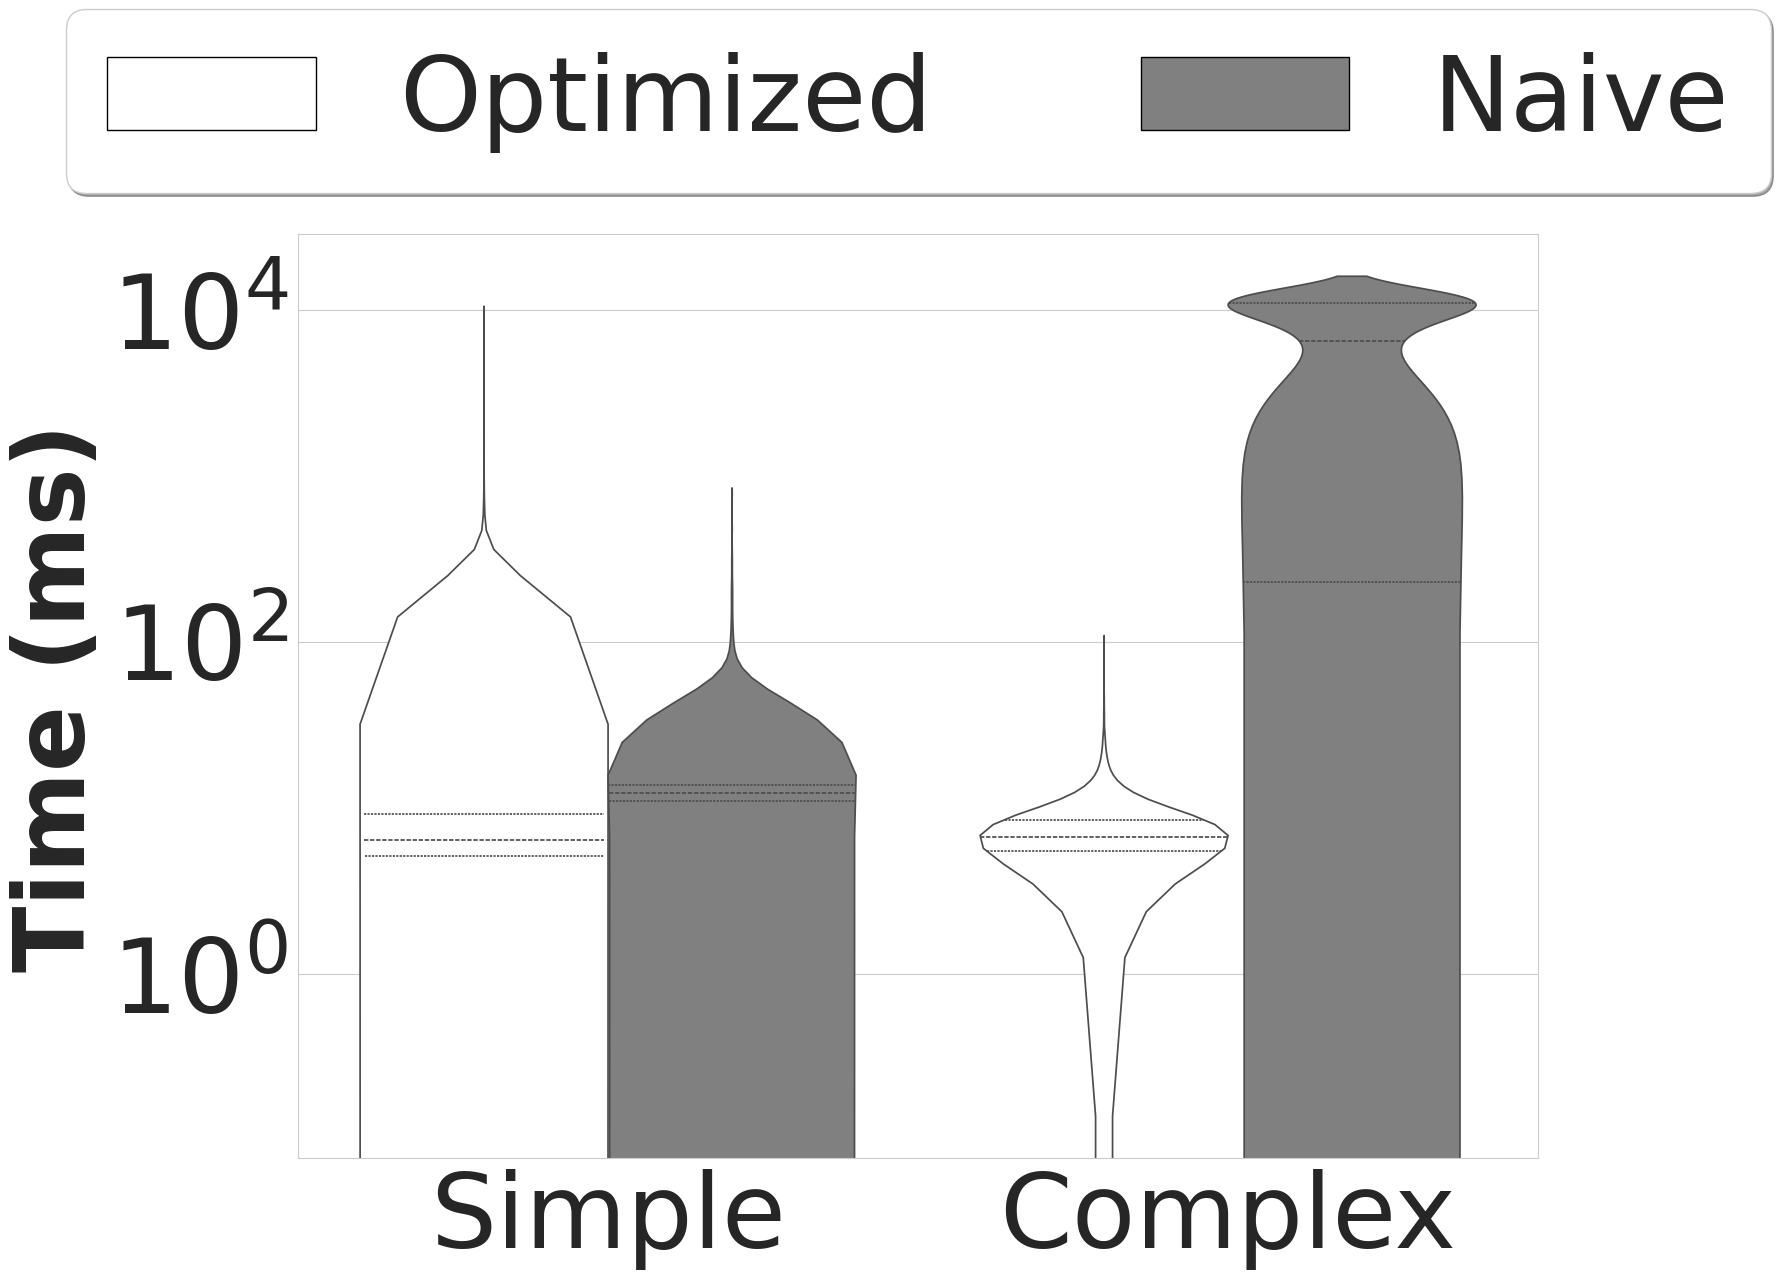

/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)


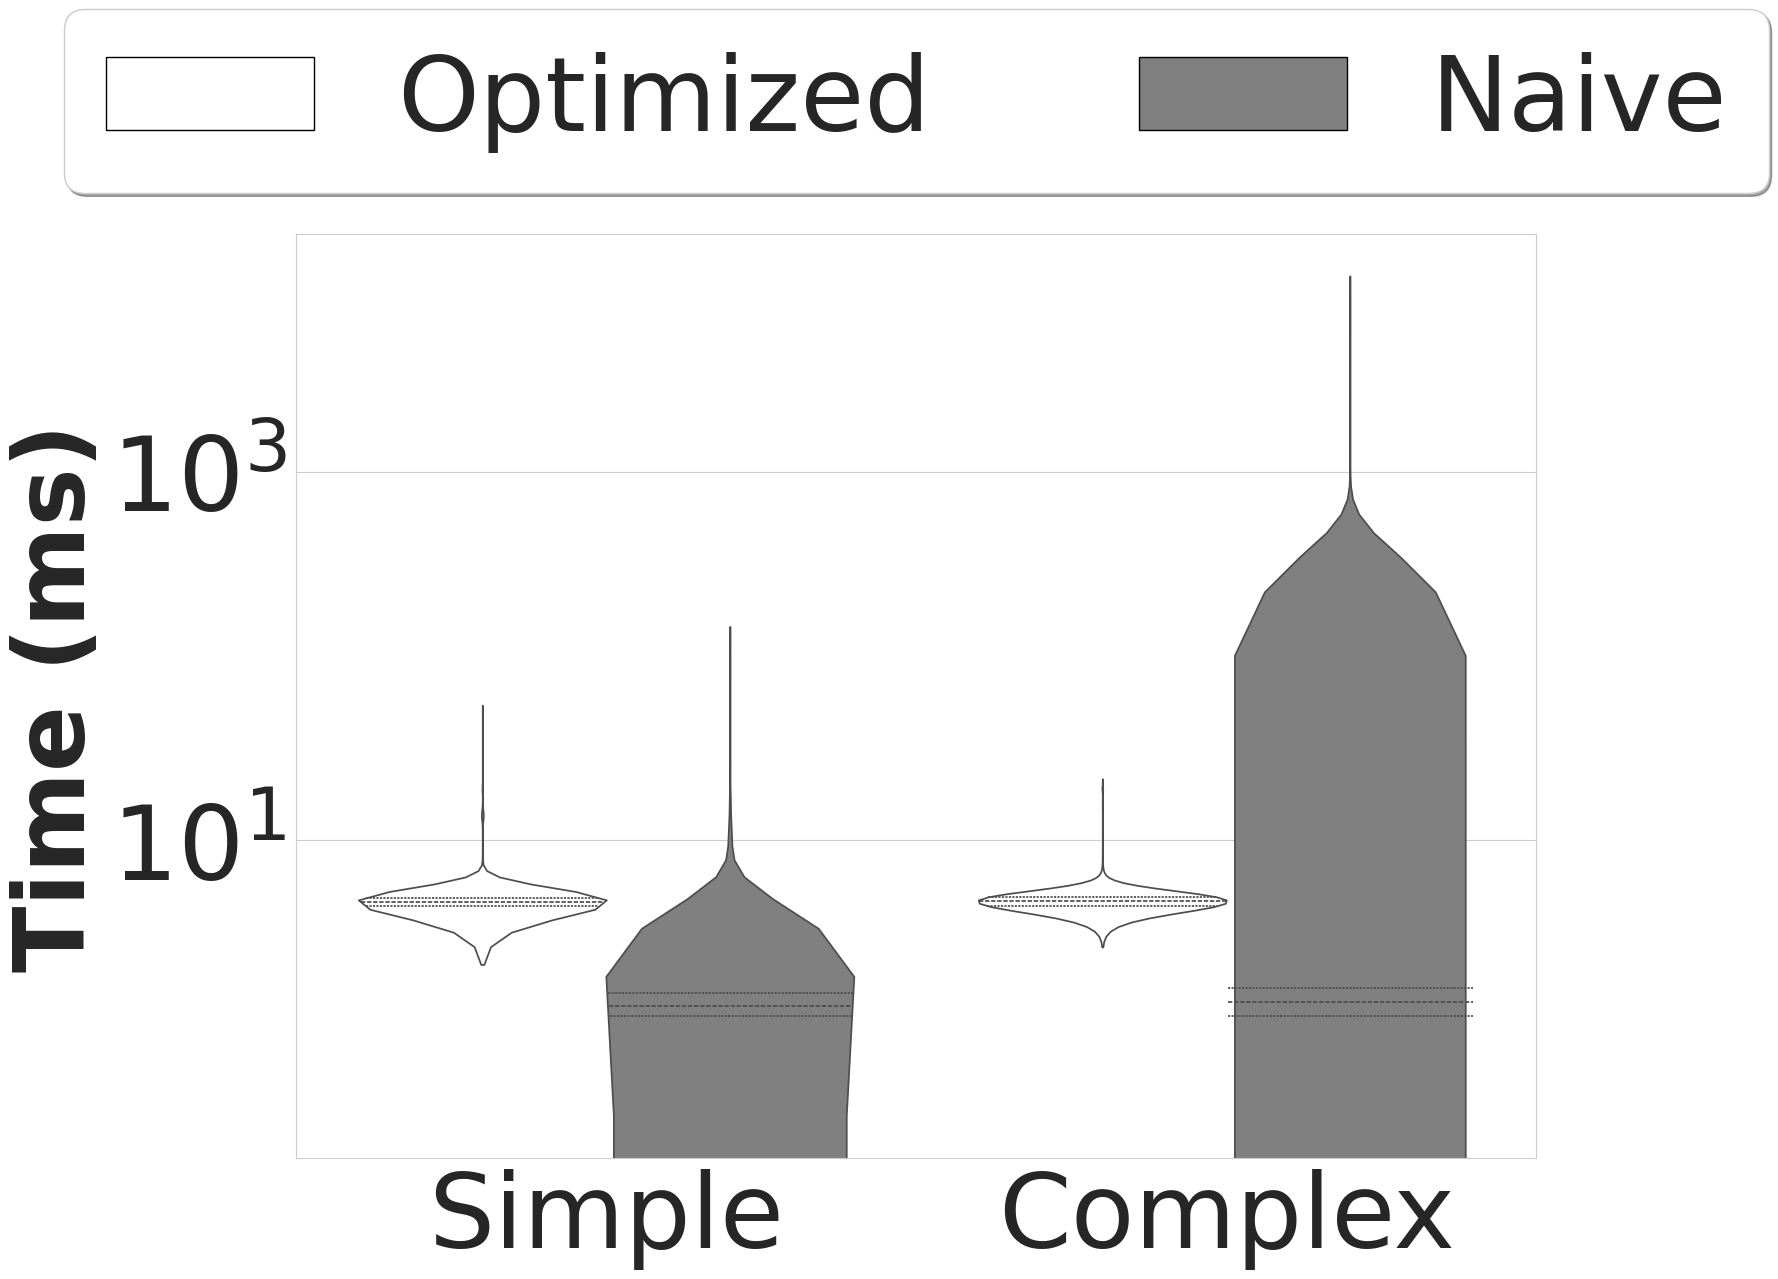

/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)


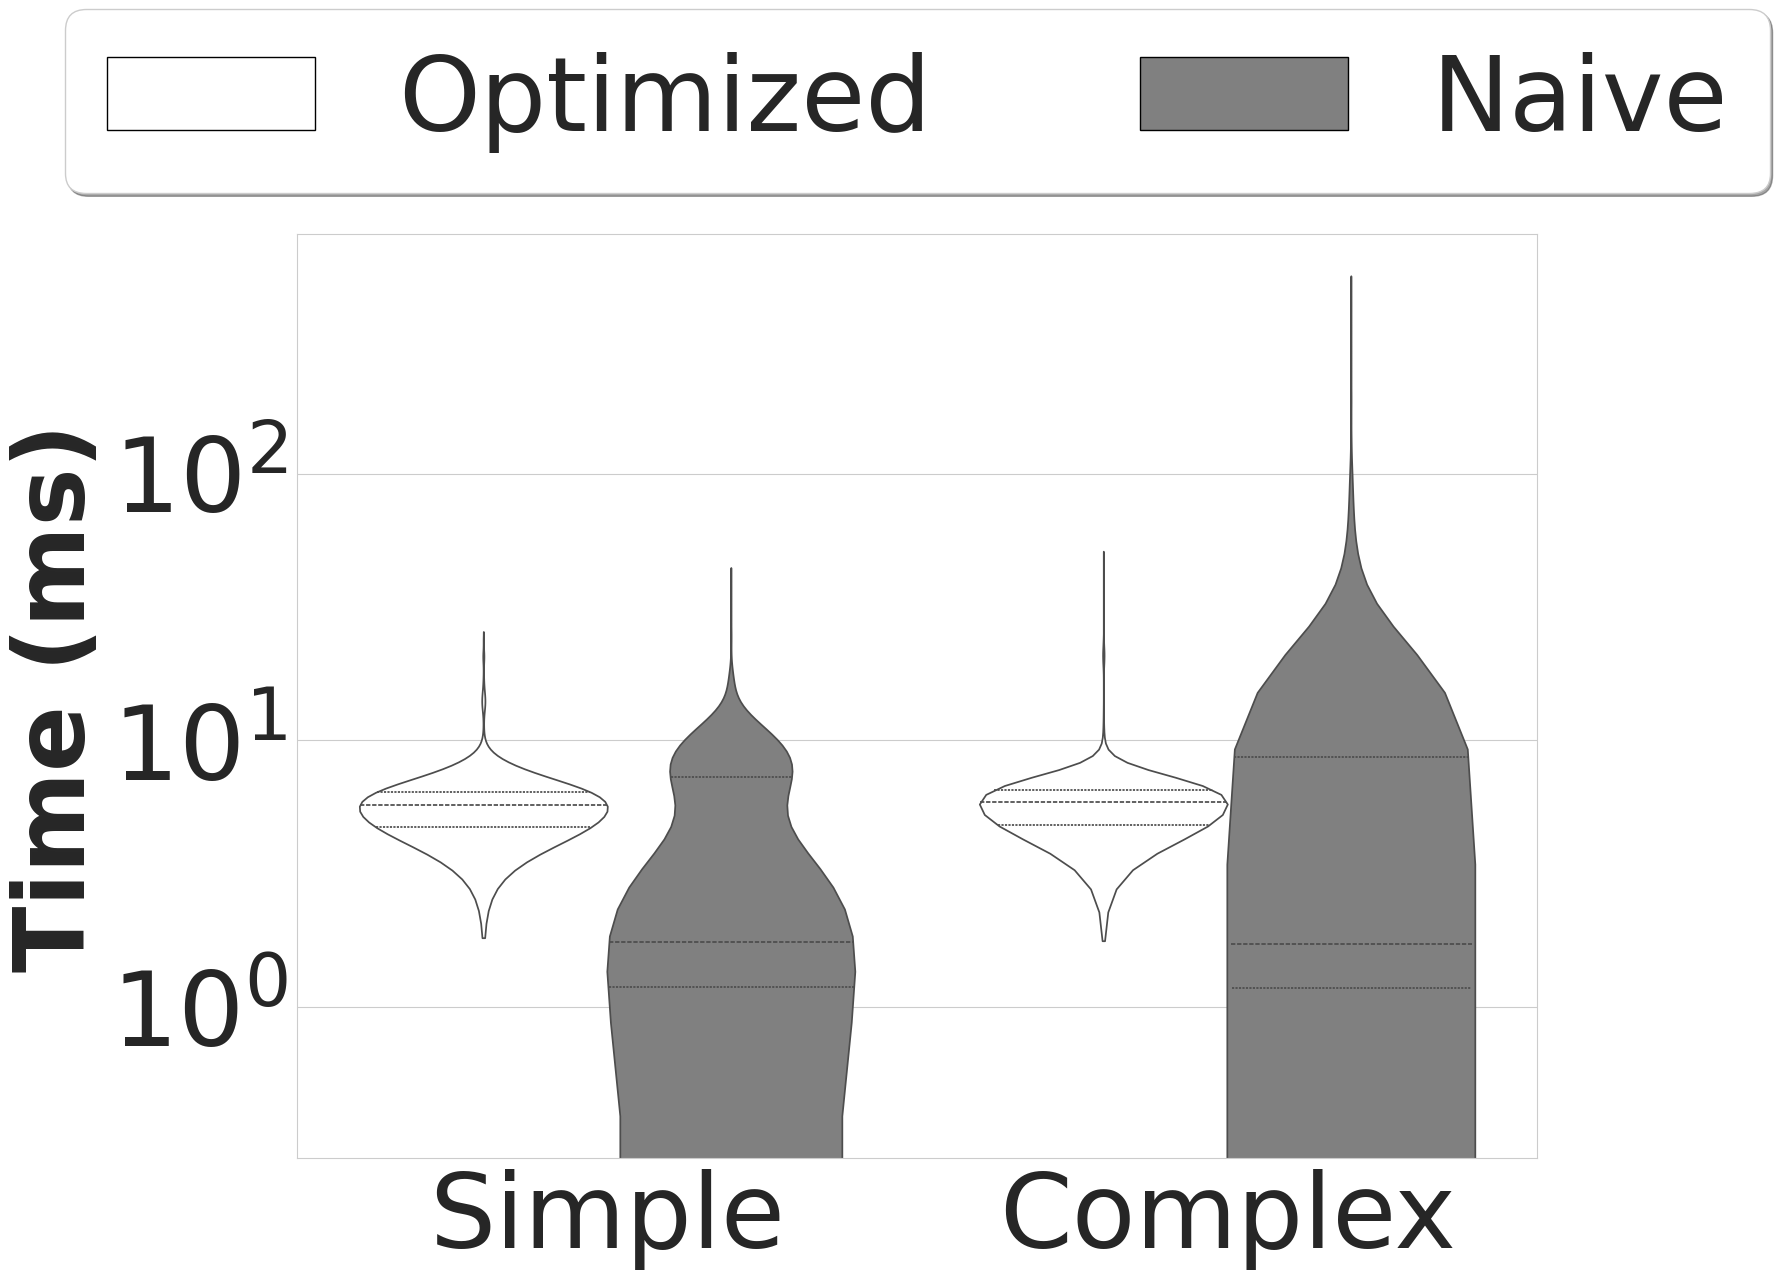

/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)


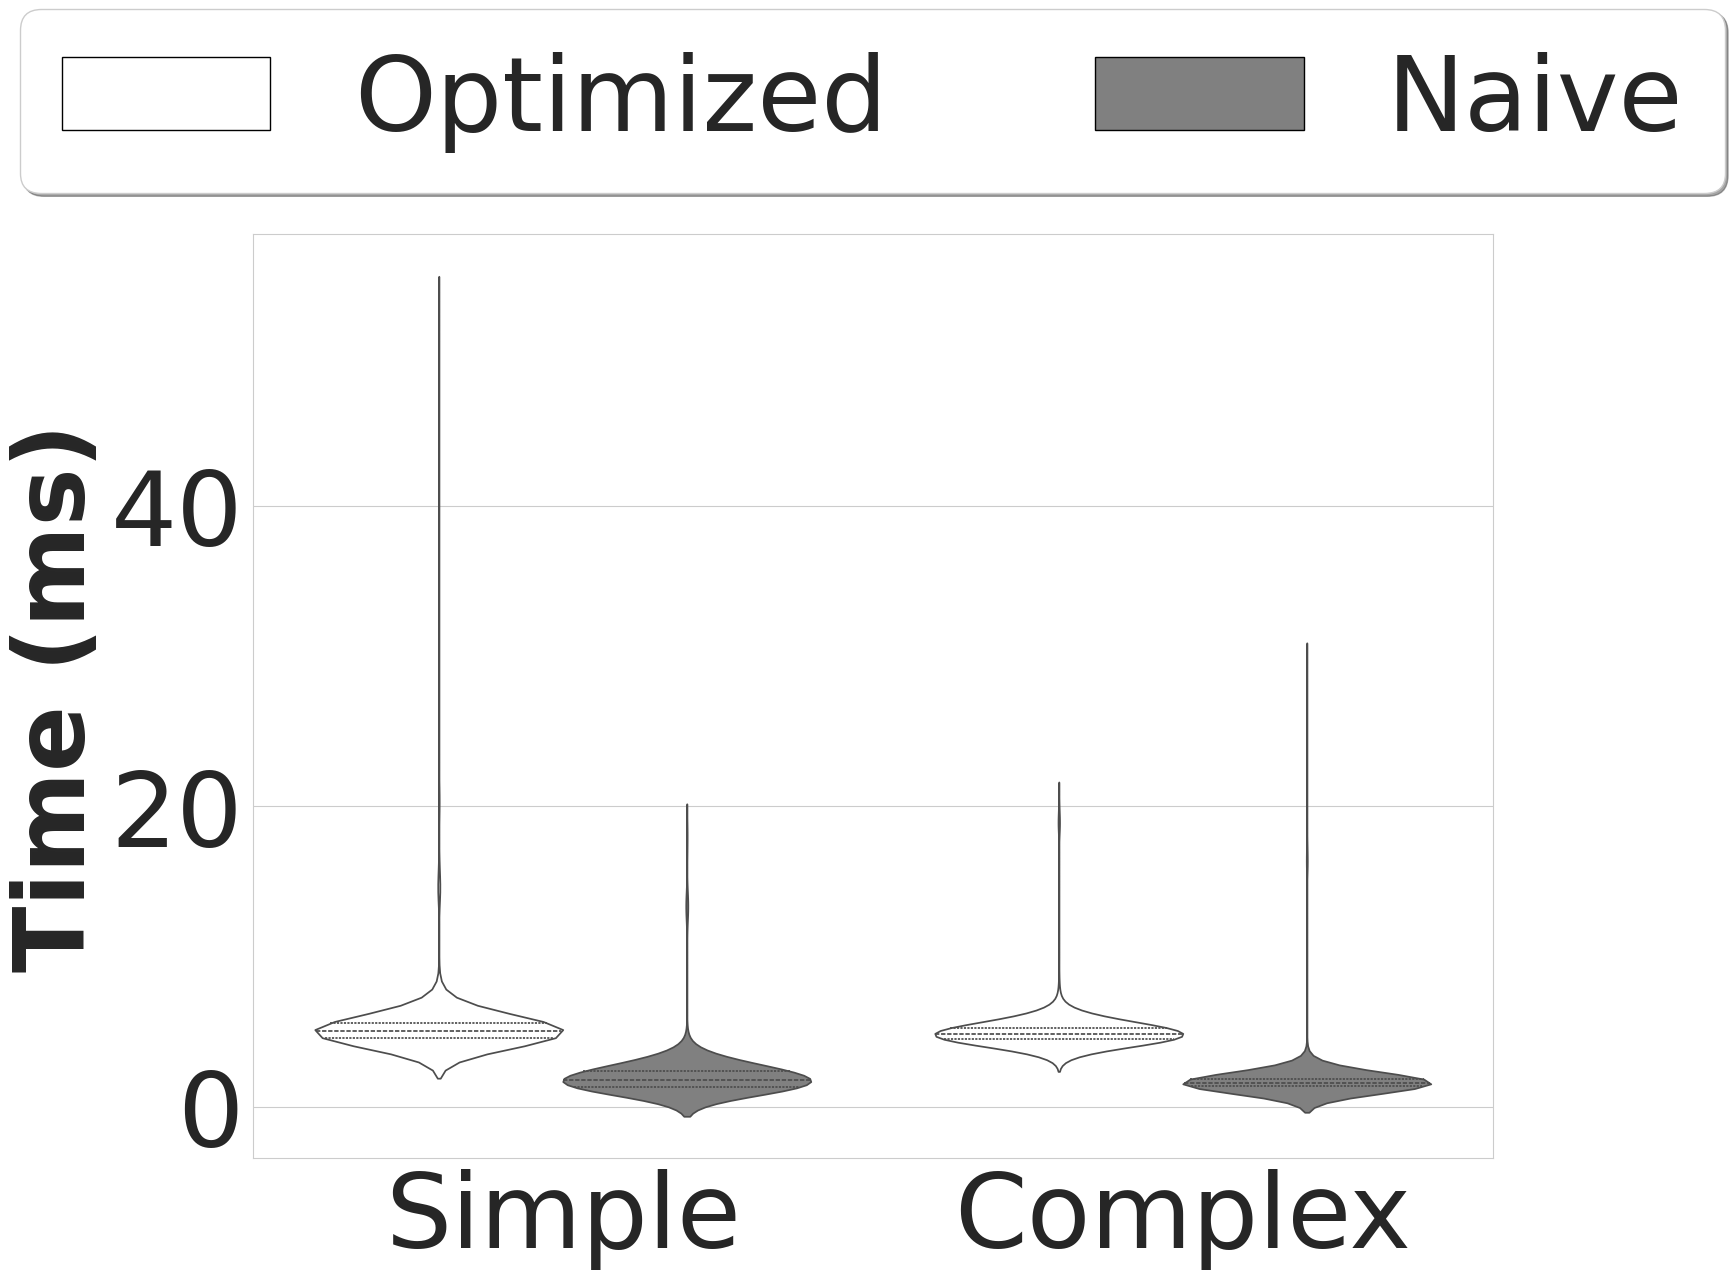

/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)


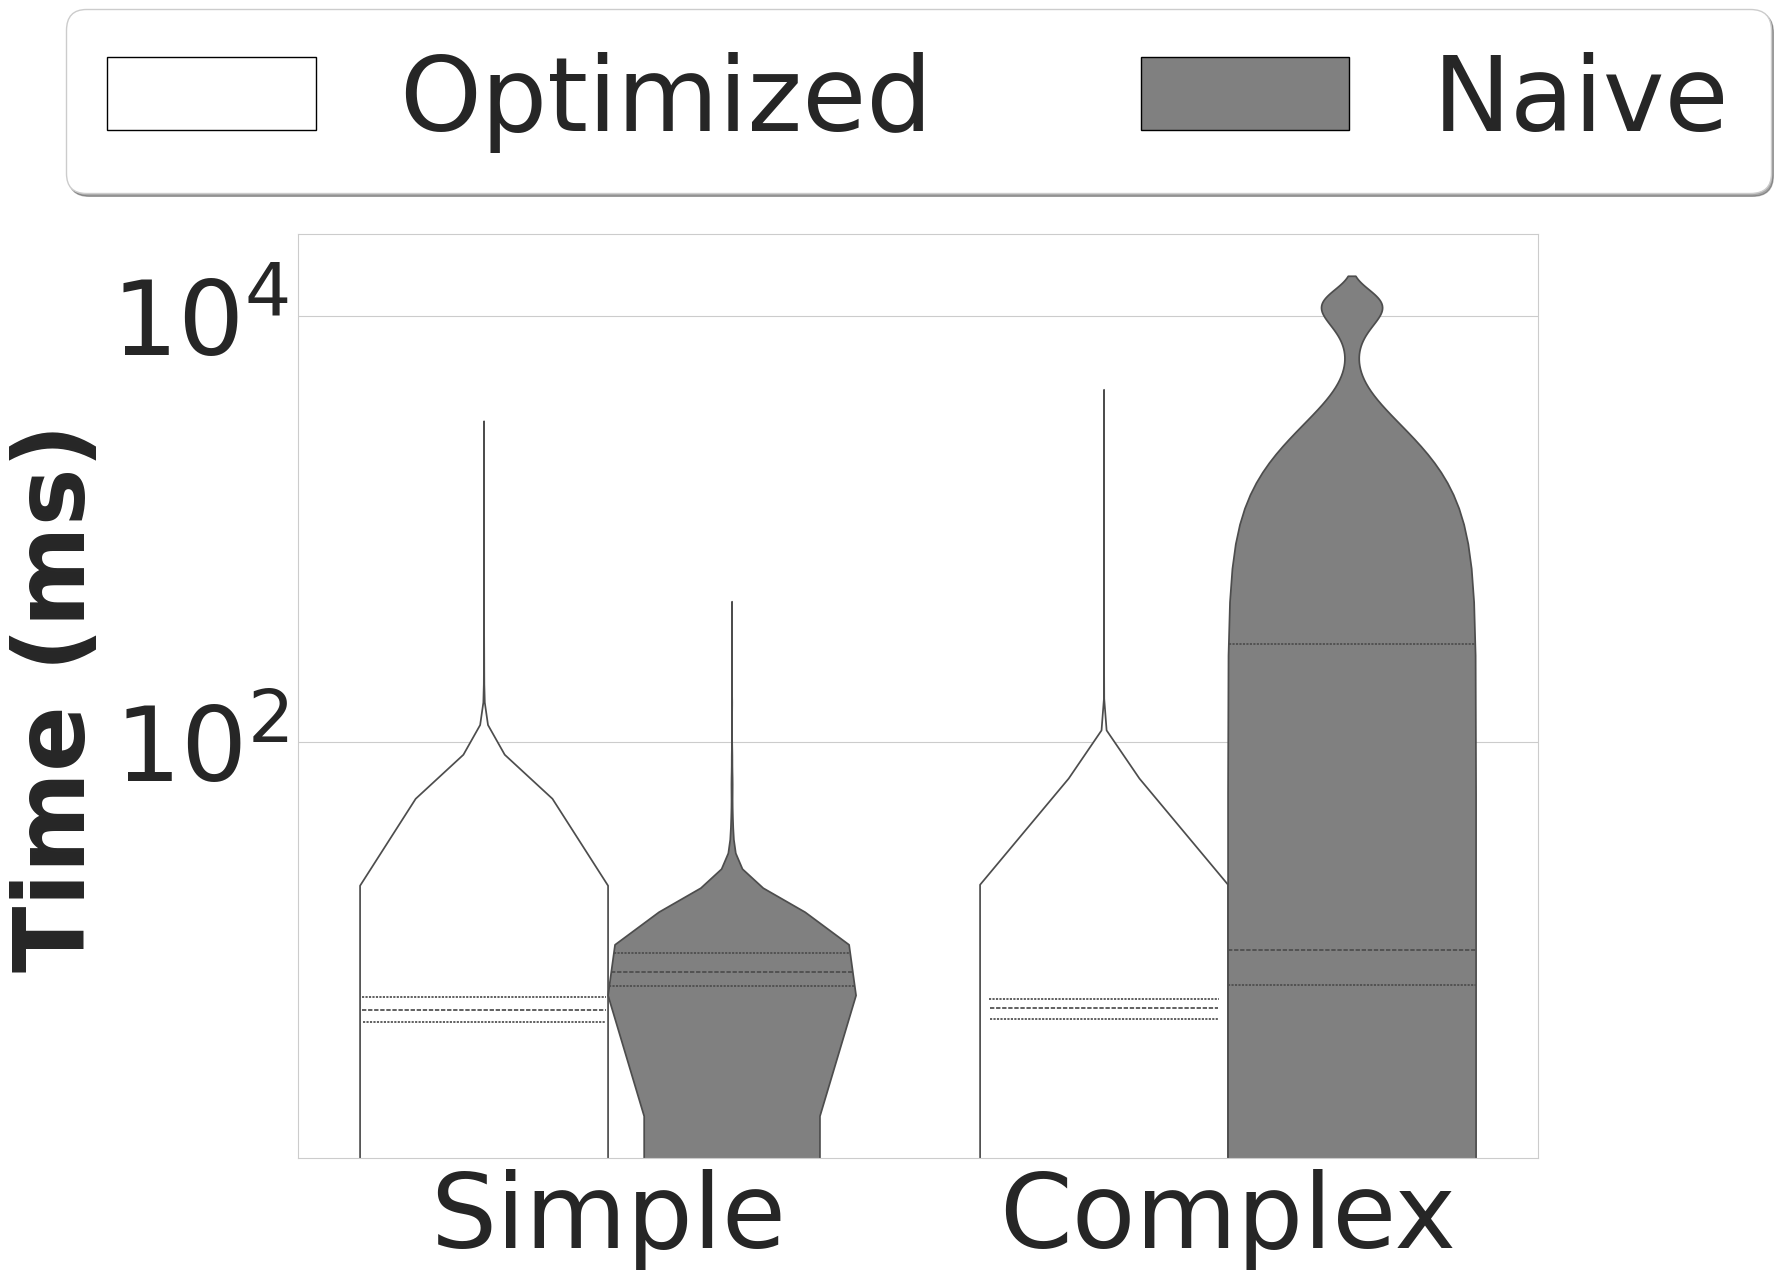

/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:63: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(data=df, x='Constraint_Complexity', y='Time',
/tmp/ipykernel_121660/556773287.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Simple', 'Complex'], fontsize=75)


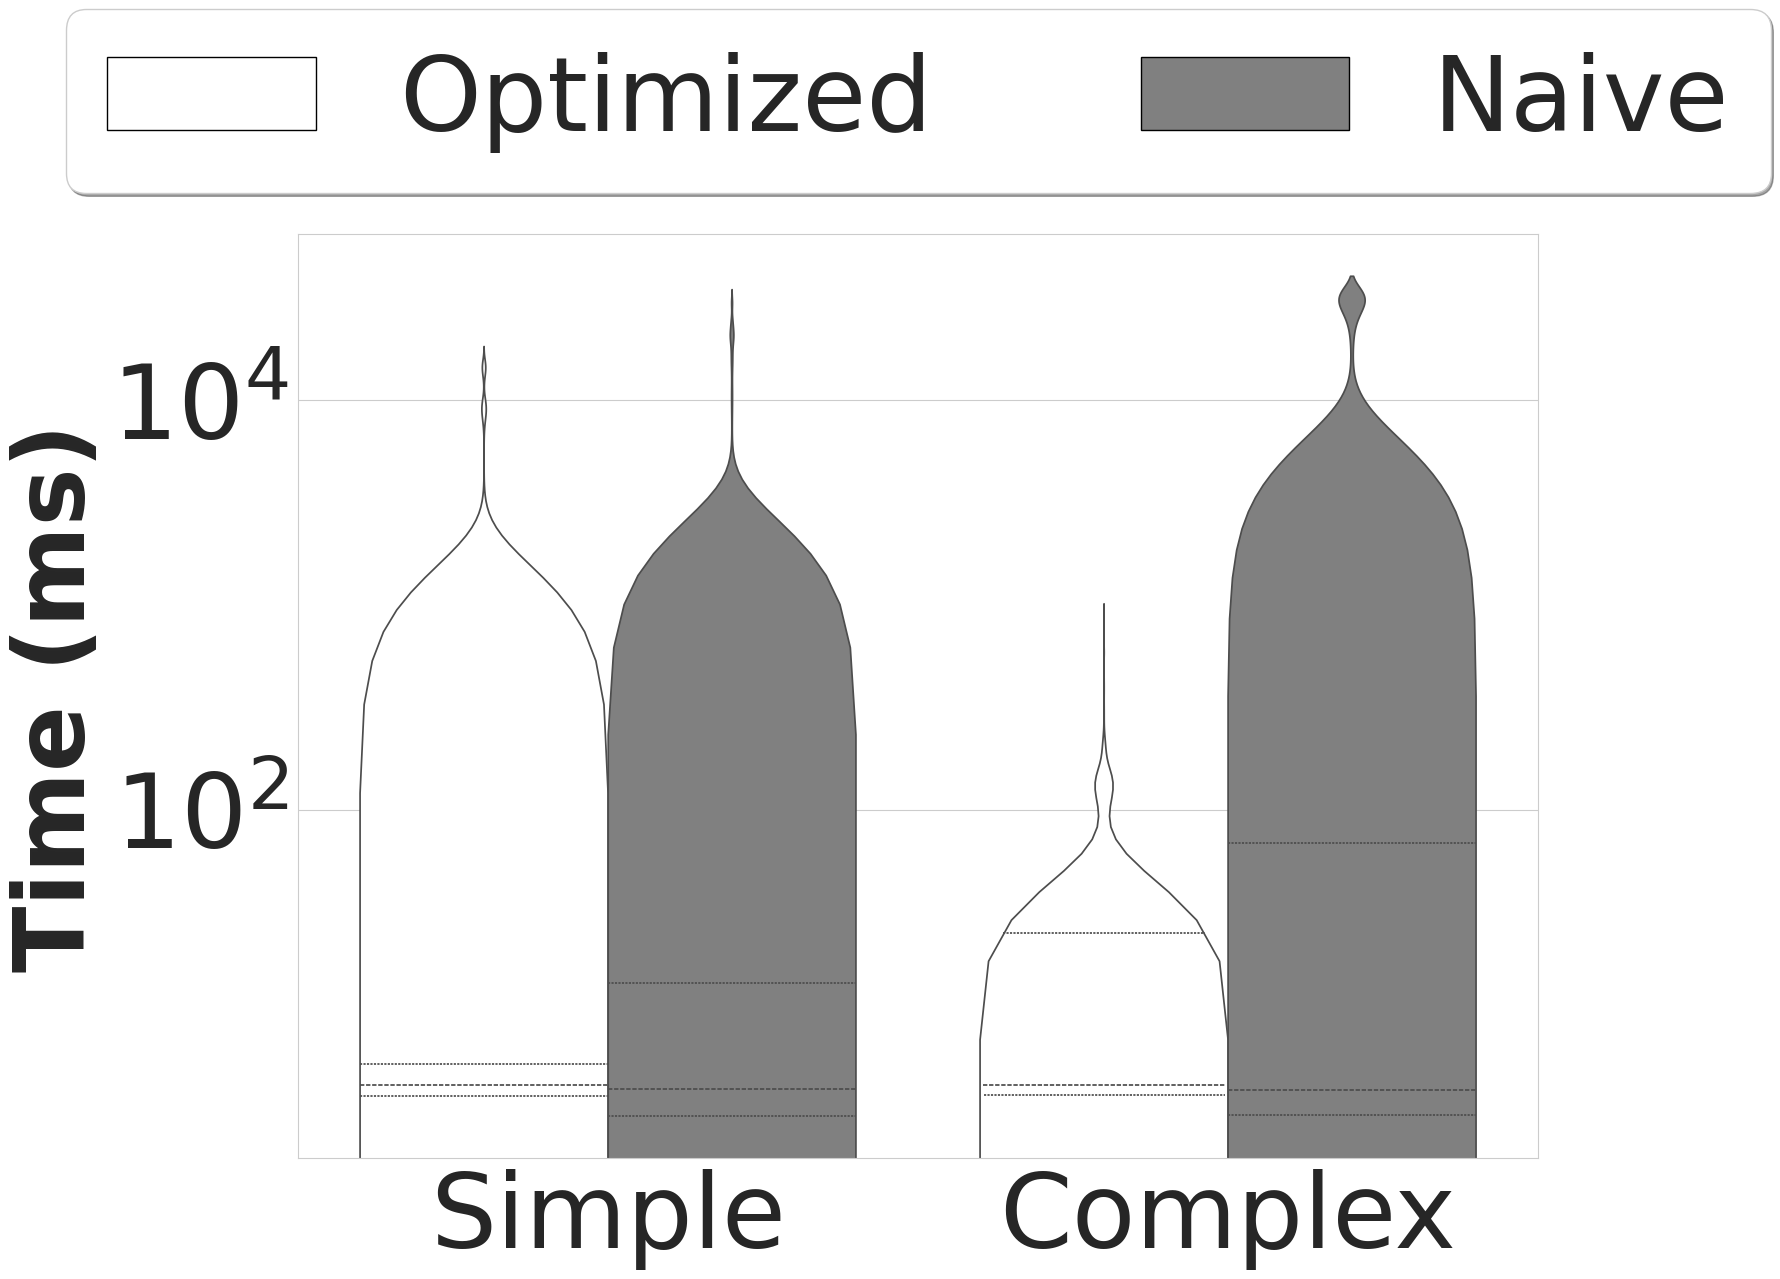

,Query,Data Constraint,Dataset,Time,IsTimeout,Constraint_Complexity
0,Q1,D1,Optimized,67.777438,False,Simple
1,Q1,D1,Optimized,18.429067,False,Simple
2,Q1,D1,Optimized,16.277072,False,Simple
3,Q1,D1,Optimized,14.179999,False,Simple
4,Q1,D1,Optimized,5.115664,False,Simple
...,...,...,...,...,...,...
11995,Q12,D5,Naive,7.238986,False,Complex
11996,Q12,D5,Naive,24.036976,False,Complex
11997,Q12,D5,Naive,4.709398,False,Complex
11998,Q12,D5,Naive,30966.055344,True,Complex


In [14]:
plot_time_distribution_by_constraint("ldbc10/ldbc10_statistic.pkl", "ldbc10-naive/ldbc10_naive_statistic.pkl", ds="LDBC10", timeout=10)
plot_time_distribution_by_constraint("ldbc01/ldbc01_statistic.pkl", "ldbc01-naive/ldbc01_naive_statistic.pkl", ds="LDBC01", timeout=10)
plot_time_distribution_by_constraint("paradise/icij_paradise_statistic.pkl", "paradise-naive/icij_paradise_naive_statistic.pkl", ds="Paradise", timeout=10)
plot_time_distribution_by_constraint("icij-leak/icij_leak_statistic.pkl", "icij-leak-naive/icij_leak_naive_statistic.pkl", ds="ICIJ", timeout=10)

plot_time_distribution_by_constraint("pokec/pokec_statistic.pkl", "pokec-naive/pokec_naive_statistic.pkl", ds="Pokec", timeout=10)
plot_time_distribution_by_constraint("telecom/telecom_statistic.pkl", "telecom-naive/telecom_naive_statistic.pkl", ds="Telecom", timeout=30)


In [78]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.ticker as ticker

def plot_single_dataset_boxplot(path, ds, name="Dataset", log_scale=True):
    # Load the dataset
    with open(path, "rb+") as f:
        data = pickle.loads(f.read())
    
    # Process the dataset
    data_groups = []
    for i in range(12):  # Q1-Q12
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
            if id == 0:
                id += 1
                continue
            values = list(map(lambda x: x, data[i*6 + id][2]))
            data_groups.append((f"Q{i+1}", dtype, name, values))
            id += 1

    # Prepare data for box plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        for value in values:
            plot_data.append({
                'Query': group,
                'Data Constraint': dtype,
                'Dataset': dataset_name,
                'Time': value
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create a single large figure
    fig, ax = plt.subplots(figsize=(16, 10))
    sns.set_style("whitegrid")

    # Get current font sizes to calculate double size
    current_fontsize = plt.rcParams['font.size']
    double_fontsize = current_fontsize * 3

    # Create box plots for all queries (Q as x-axis)
    boxplot = sns.boxplot(data=df, x='Query', y='Time', 
                         hue='Data Constraint', ax=ax, showfliers=False,
                         palette='viridis', dodge=True)
    
    # Set titles and labels with larger font
    # ax.set_title(f"Runtime Distribution - {ds}", fontweight='bold', fontsize=double_fontsize * 1.2)
    ax.set_xlabel("")
    ax.set_ylabel("Time (ms)", fontsize=double_fontsize)
    
    # Increase tick label size
    ax.tick_params(axis='x', labelsize=double_fontsize * 0.9)
    ax.tick_params(axis='y', labelsize=double_fontsize * 0.9)
    
    # plt.setp(ax.get_xticklabels())
    
    # Check for log scale
    max_time_val = df['Time'].max()
    min_time_val = df[df['Time'] > 0]['Time'].min()  # Exclude zeros
    if log_scale and max_time_val > 0 and min_time_val > 0 and max_time_val / min_time_val > 1000:
        ax.set_yscale("log")
        # ax.set_title(f"Runtime Distribution - {ds} (log scale)", fontweight='bold', fontsize=double_fontsize * 1.2)
    else:
        # Reduce distance between y-axis ticks by half for linear scale
        y_min, y_max = ax.get_ylim()
        current_ticks = ax.get_yticks()
        
        if len(current_ticks) > 1:
            current_spacing = current_ticks[1] - current_ticks[0]
            new_spacing = current_spacing / 2
            
            # Make sure we don't create too many ticks
            max_ticks = 20
            num_ticks = int((y_max - y_min) / new_spacing) + 1
            
            if num_ticks <= max_ticks:
                new_ticks = np.arange(round(y_min / new_spacing) * new_spacing, 
                                     round(y_max / new_spacing) * new_spacing + new_spacing, 
                                     new_spacing)
                ax.set_yticks(new_ticks)
            else:
                # Use automatic locator if too many ticks would be created
                ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=max_ticks))

    # Create legend for data constraints only
    data_constraints = ["D1", "D2", "D3", "D4", "D5"]
    colors = plt.cm.viridis(np.linspace(0, 1, len(data_constraints)))
    
    legend_elements = []
    for constraint, color in zip(data_constraints, colors):
        legend_elements.append(
            Patch(facecolor=color, label=f'{constraint}')
        )
    

    legend = ax.legend(handles=legend_elements, 
                      loc='upper center',  # Changed to upper right corner
                      bbox_to_anchor=(0.5, 1.2),  # Slightly inside the corner
                      ncol=5,  # Single column for corner placement
                      fontsize=double_fontsize ,  # Even larger text for legend
                      frameon=True, 
                      fancybox=True, 
                      shadow=True,
                      title="Data Constraints", 
                      title_fontsize=double_fontsize  )  # Larger title
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.savefig(f'figure/{ds}-query-x-axis-boxplot.pdf', 
                format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()


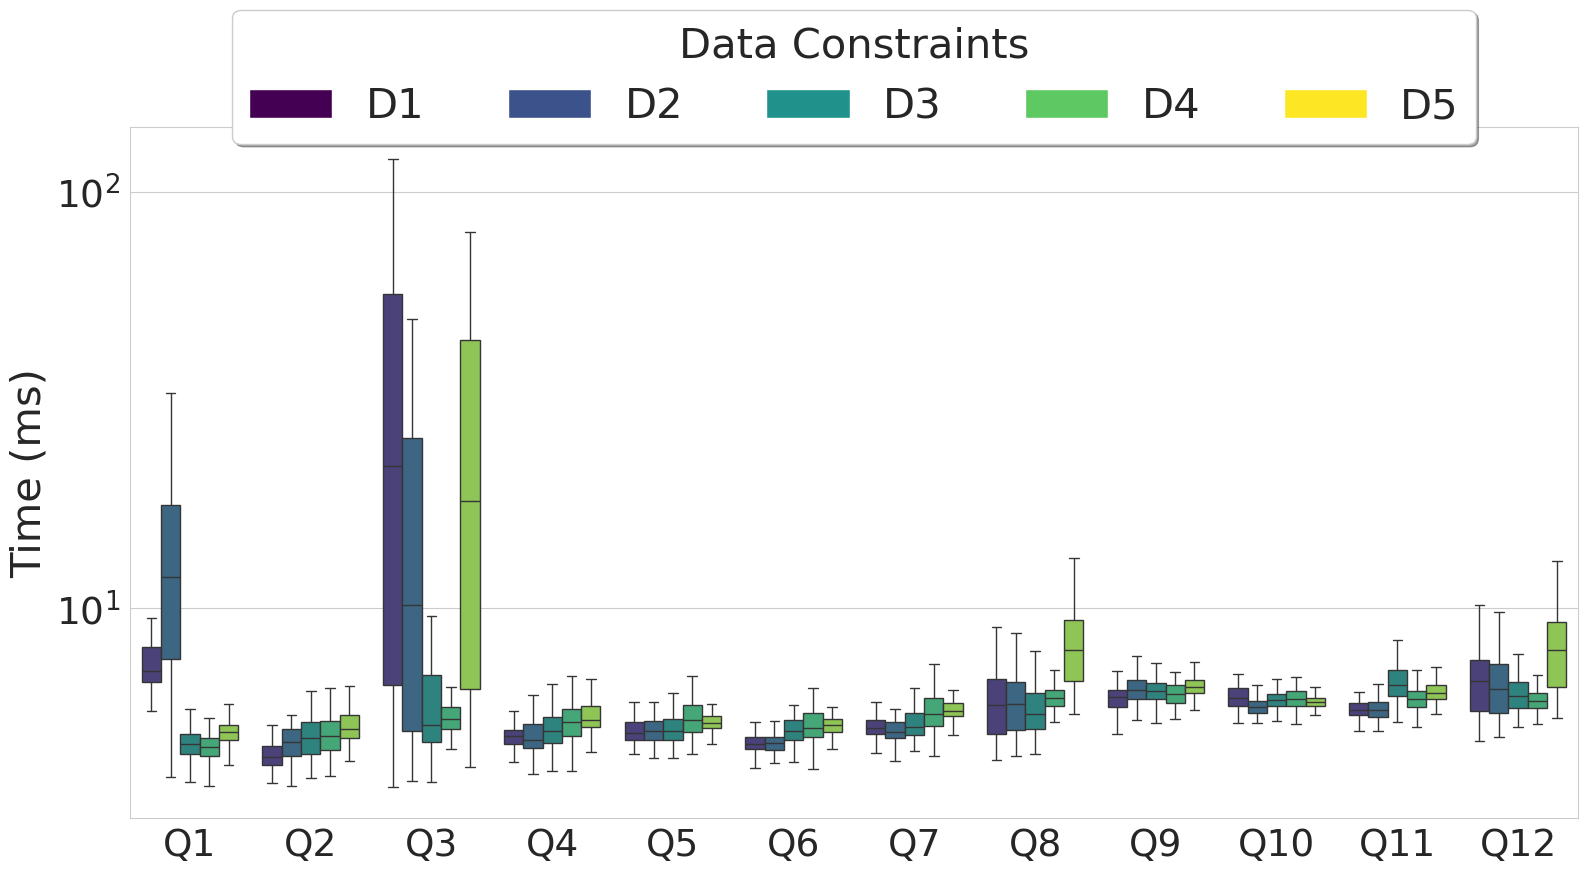

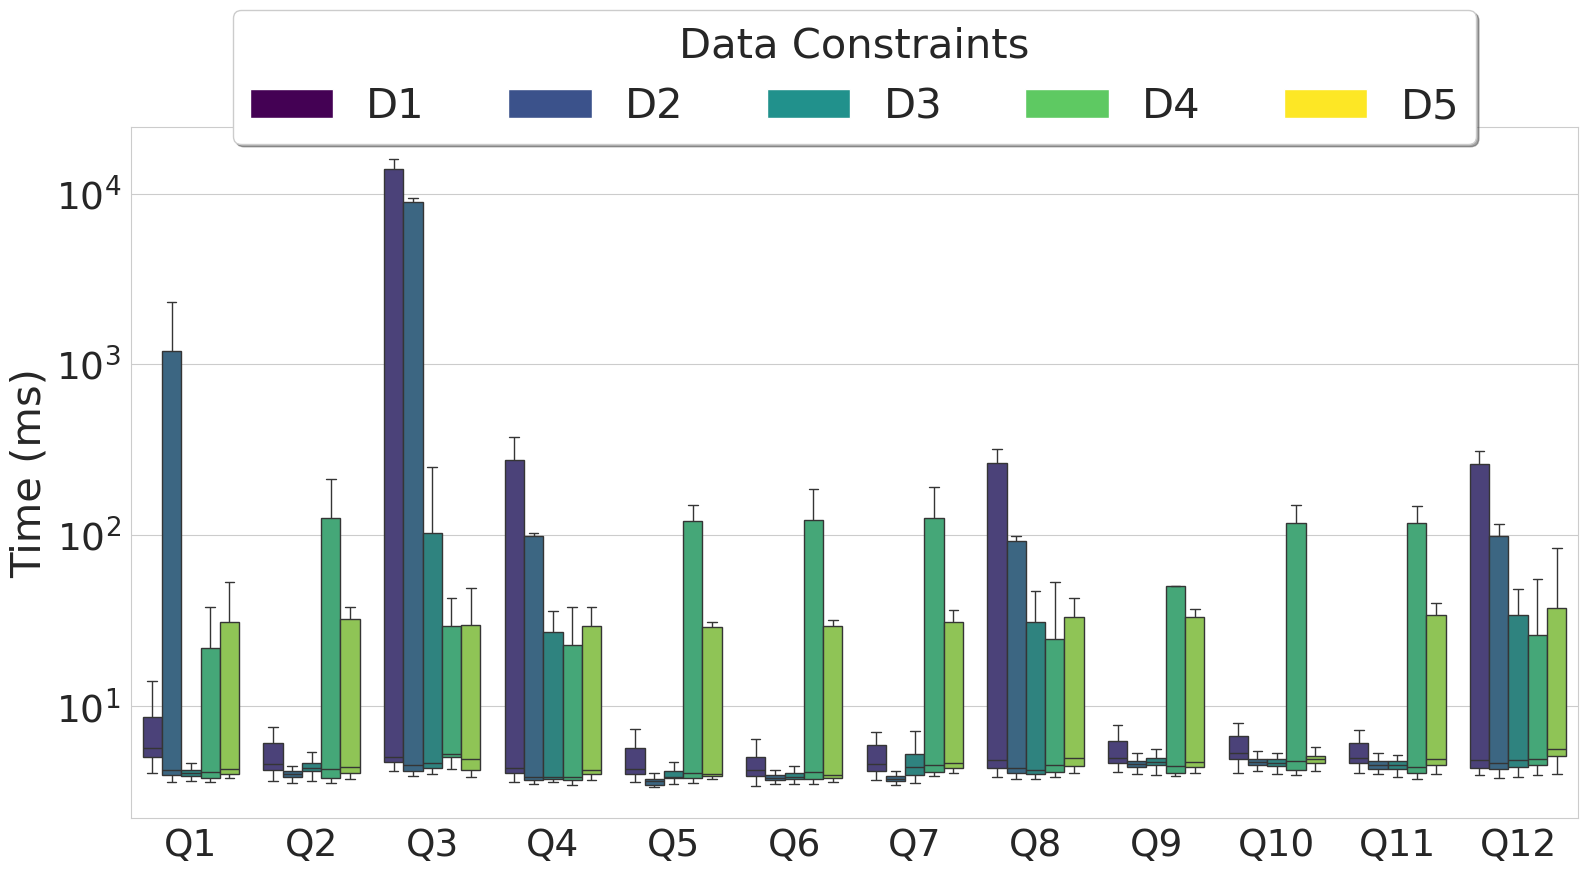

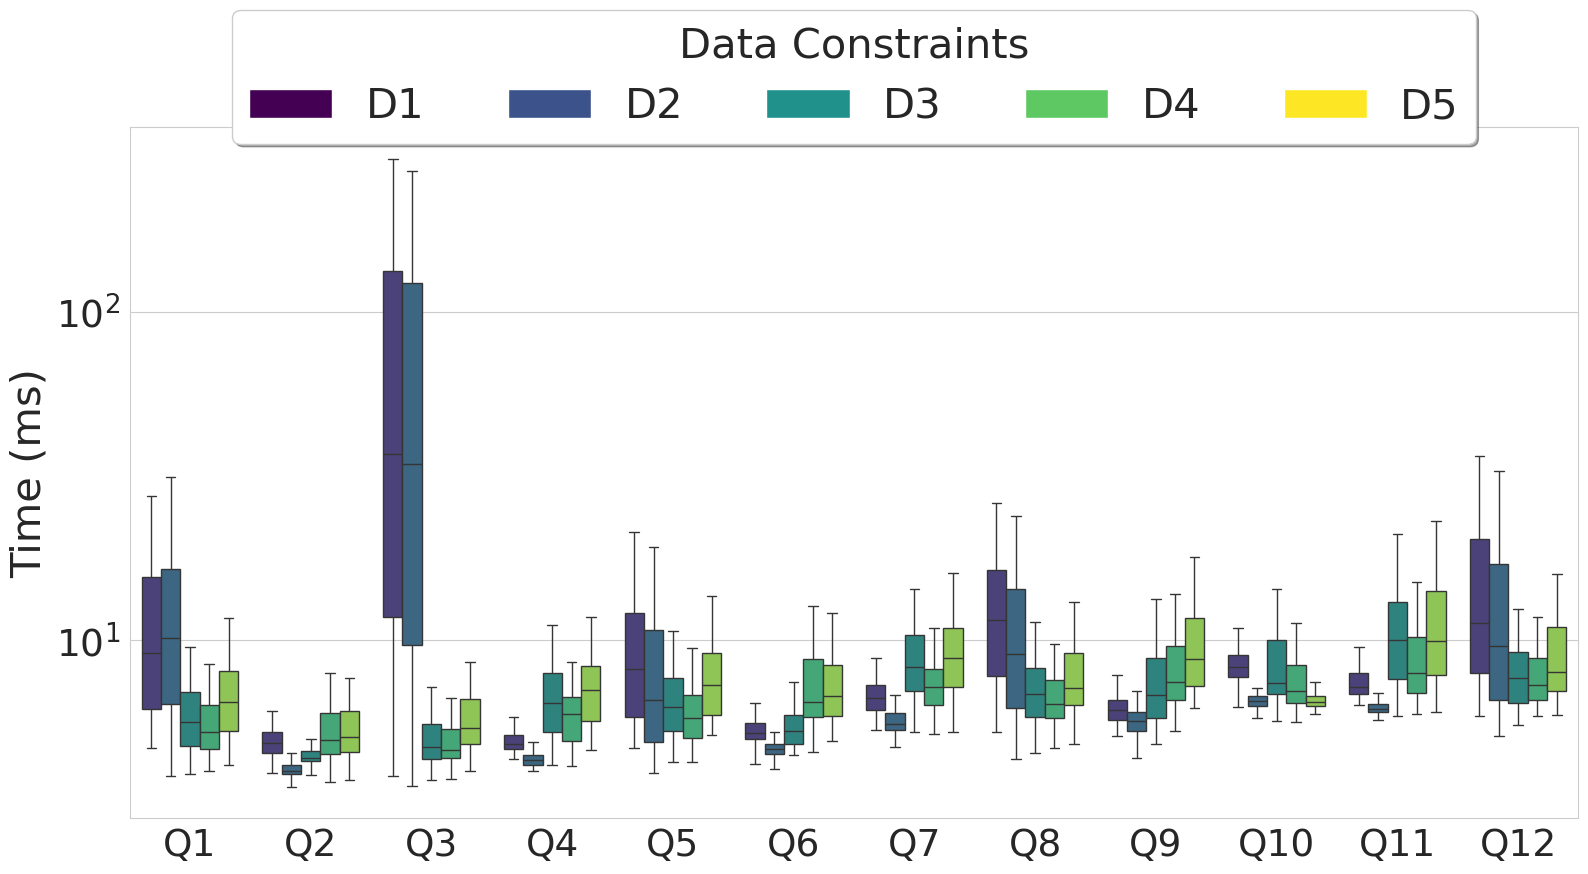

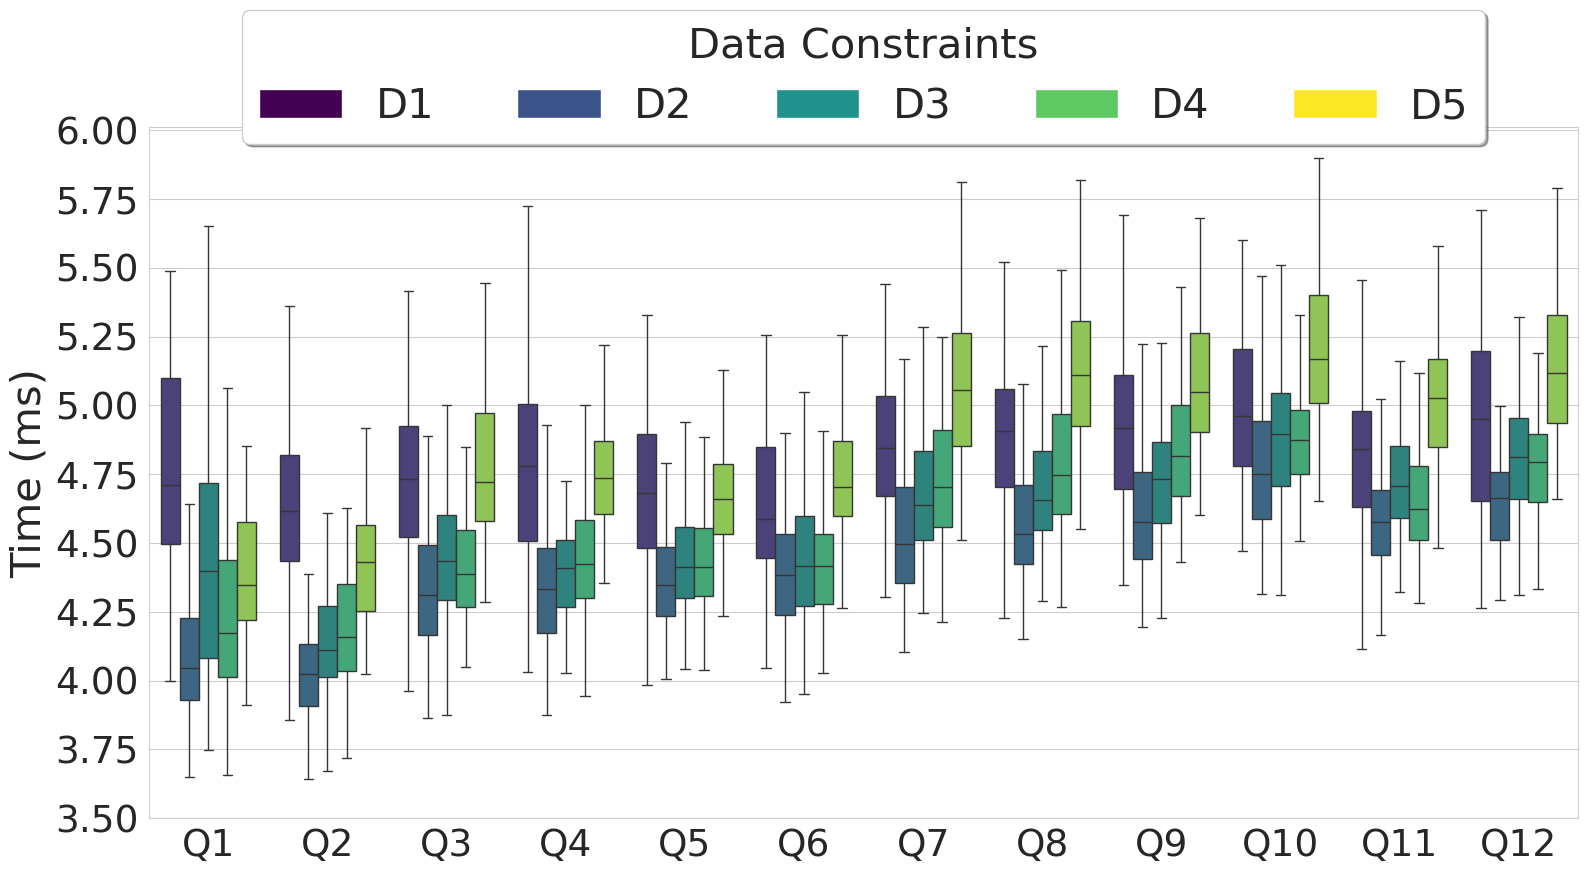

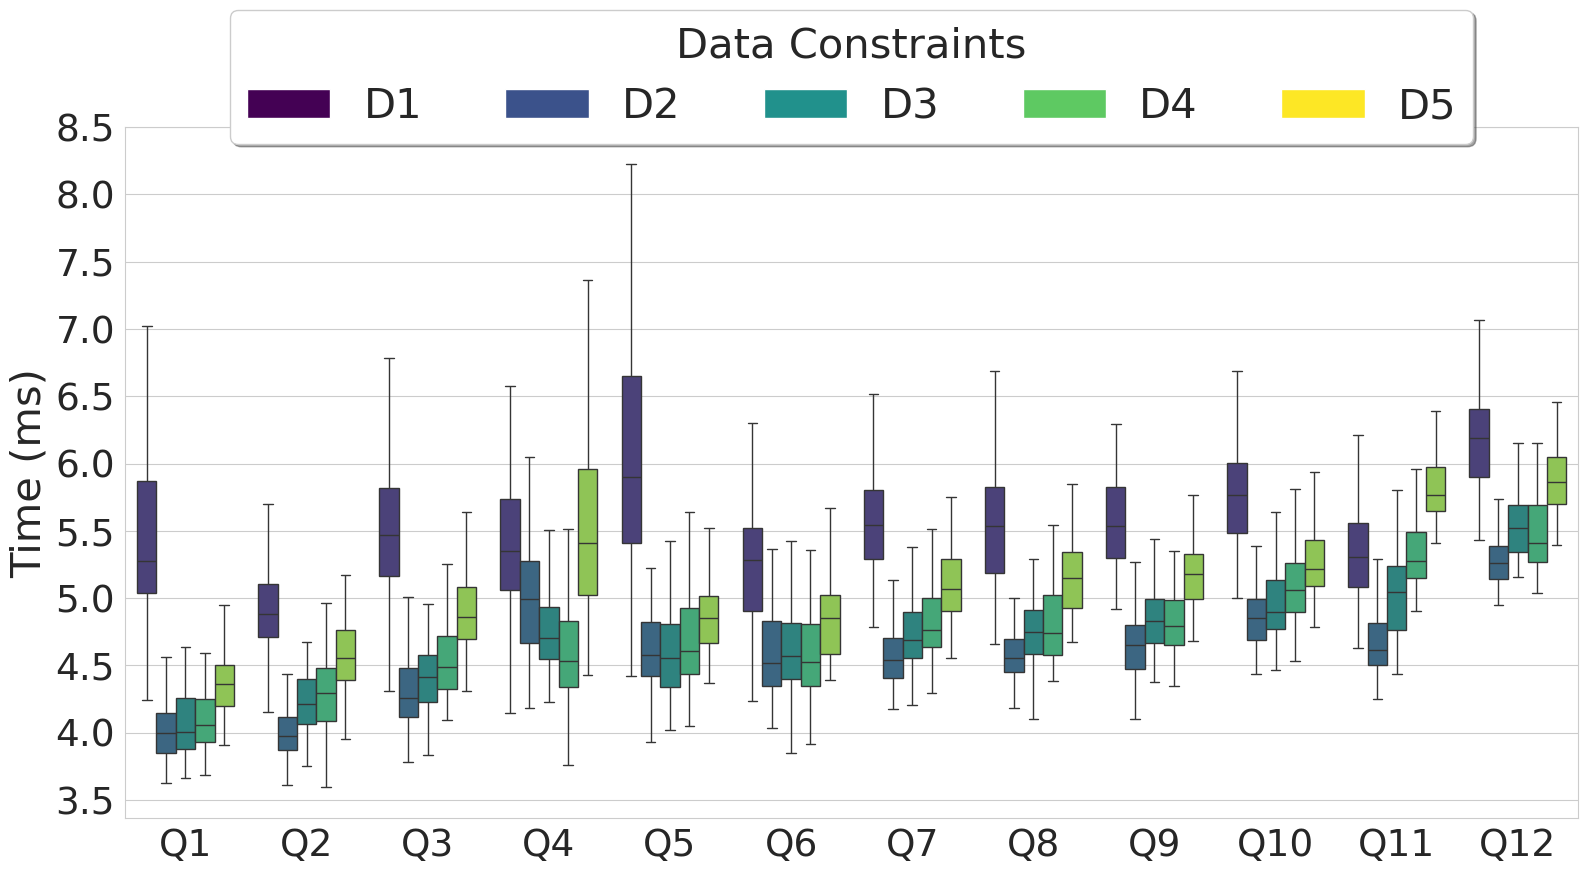

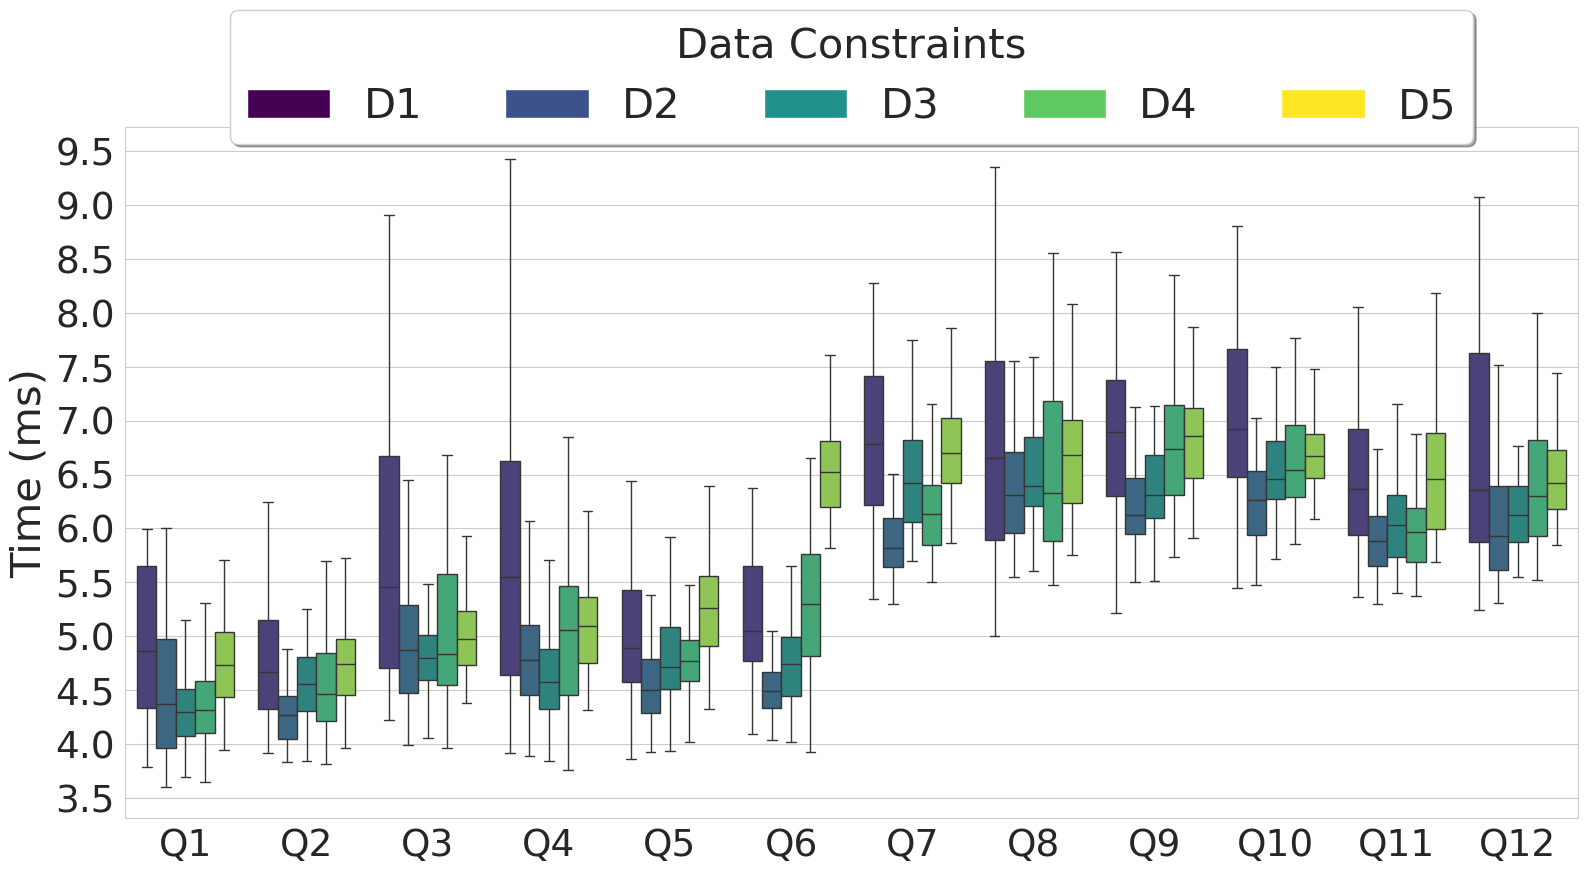

In [79]:
plot_single_dataset_boxplot("pokec/pokec_statistic.pkl", ds="Pokec")
plot_single_dataset_boxplot("telecom/telecom_statistic.pkl", ds="Telecom")
plot_single_dataset_boxplot("ldbc10/ldbc10_statistic.pkl", ds="LDBC10")
plot_single_dataset_boxplot("ldbc01/ldbc01_statistic.pkl", ds="LDBC01")
plot_single_dataset_boxplot("icij-leak/icij_leak_static.pkl", ds="ICIJ")
plot_single_dataset_boxplot("paradise/icij_paradise_statistic.pkl", ds="Paradise")





In [21]:
optimized_paths = ["ldbc01/ldbc01_statistic.pkl", 
         "ldbc10/ldbc10_statistic.pkl", 
         "pokec/pokec_statistic.pkl",
         "telecom/telecom_statistic.pkl",
            "paradise/icij_paradise_statistic.pkl",
            "icij-leak/icij_leak_statistic.pkl"]
        
naive_paths = ["ldbc01-naive/ldbc01_naive_statistic.pkl", 
         "ldbc10-naive/ldbc10_naive_statistic.pkl", 
         "pokec-naive/pokec_naive_statistic.pkl",
         "telecom-naive/telecom_naive_statistic.pkl",
            "paradise-naive/icij_paradise_naive_statistic.pkl",
            "icij-leak-naive/icij_leak_naive_statistic.pkl"]

dataset_names = ["LDBC01", "LDBC10", "Pokec", "Telecom", "ICIJ-Paradise", "ICIJ-Leak"]


In [22]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_dataset_memory_comparison(optimized_paths, dataset_names, output_name, unit='MB'):
    """
    Plot memory usage comparison between datasets, merging all constraints and queries
    Focuses only on dataset differences
    
    Parameters:
    optimized_paths: list of file paths to optimized algorithm pickle files
    dataset_names: list of dataset names for comparison
    output_name: name for output file
    unit: memory unit ('B', 'KB', 'MB', 'GB')
    """
    
    # Load all datasets
    optimized_data = []
    
    for path in optimized_paths:
        with open(path, "rb+") as f:
            data = pickle.loads(f.read())
            optimized_data.append(data)
    
    # Process memory usage - merge all constraints and queries
    dataset_stats = []
    
    for dataset_idx, (data, dataset_name) in enumerate(zip(optimized_data, dataset_names)):
        all_memory_values = []
        
        # Collect all memory values across all queries and constraints
        for i in range(12):  # Q1-Q12
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:  # Skip RPQ
                    id += 1
                    continue
                
                # Extract memory usage data (third domain)
                memory_data = data[i*6 + id][3]  # Third domain contains memory usage
                all_memory_values.append(memory_data)
                id += 1
        
        # Convert to appropriate unit
        all_memory_values = np.array(all_memory_values)
        if unit == 'KB':
            all_memory_values = all_memory_values * 1024
        elif unit == 'MB':
            all_memory_values = all_memory_values 
        elif unit == 'GB':
            all_memory_values = all_memory_values / 1024 
        
        # Calculate statistics
        dataset_stats.append({
            'Dataset': dataset_name,
            'Max Memory': np.max(all_memory_values),
            'Average Memory': np.mean(all_memory_values),
            'Median Memory': np.median(all_memory_values),
            '95th Percentile': np.percentile(all_memory_values, 95),
            'Total Memory': np.sum(all_memory_values),
            'Memory Values': all_memory_values  # Store for boxplot
        })
    
    # Create DataFrame
    df = pd.DataFrame(dataset_stats)
    
    # Create figure with multiple subplots
    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(1, 4, figsize=(16, 12))
    fig, ax1 = plt.subplots(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Get current font sizes
    current_fontsize = plt.rcParams['font.size']
    larger_fontsize = current_fontsize * 2
    
    # Colors for datasets
    colors = plt.cm.Set3(np.linspace(0, 1, len(dataset_names)))
    
    # # Plot 1: Max Memory Usage
    bars1 = ax1.bar(range(len(df)), df['Max Memory'], color=colors, alpha=0.8)
    # ax1.set_title(f"Maximum Memory Usage ({unit})", fontsize=larger_fontsize, fontweight='bold')
    ax1.set_ylabel(f"Memory ({unit})", fontsize=larger_fontsize * 0.8)
    ax1.set_xticks(range(len(df)))
    ax1.set_xticklabels(df['Dataset'], ha='center', fontsize=larger_fontsize * 0.9)
    add_value_labels(ax1, bars1)
    
    # # Plot 2: Average Memory Usage
    # bars2 = ax2.bar(range(len(df)), df['Average Memory'], color=colors, alpha=0.8)
    # ax2.set_title(f"Average Memory Usage ({unit})", fontsize=larger_fontsize, fontweight='bold')
    # ax2.set_ylabel(f"Memory ({unit})", fontsize=larger_fontsize * 0.8)
    # ax2.set_xticks(range(len(df)))
    # ax2.set_xticklabels(df['Dataset'], rotation=45, ha='right', fontsize=larger_fontsize * 0.7)
    # add_value_labels(ax2, bars2)
    
    # # Plot 3: 95th Percentile Memory Usage
    # bars3 = ax3.bar(range(len(df)), df['95th Percentile'], color=colors, alpha=0.8)
    # ax3.set_title(f"95th Percentile Memory Usage ({unit})", fontsize=larger_fontsize, fontweight='bold')
    # ax3.set_ylabel(f"Memory ({unit})", fontsize=larger_fontsize * 0.8)
    # ax3.set_xticks(range(len(df)))
    # ax3.set_xticklabels(df['Dataset'], rotation=45, ha='right', fontsize=larger_fontsize * 0.7)
    # add_value_labels(ax3, bars3)
    
#    # Plot 4: Total Memory Usage
#     bars4 = ax4.bar(range(len(df)), df['Total Memory'], color=colors, alpha=0.8)
#     ax4 .set_title(f"Total Memory Usage ({unit})", fontsize=larger_fontsize, fontweight='bold')
#     ax4.set_ylabel(f"Memory ({unit})", fontsize=larger_fontsize * 0.8)
#     ax4.set_xticks(range(len(df)))
#     ax4.set_xticklabels(df['Dataset'], rotation=45, ha='right', fontsize=larger_fontsize * 0.7)
#     add_value_labels(ax4, bars4)
    
    # Main title
    # plt.suptitle("Memory Usage Comparison Across Datasets (All Constraints & Queries Merged)", 
    #             fontsize=larger_fontsize * 1.5, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save figure
    plt.savefig(f'figure/{output_name}-dataset-memory-comparison.pdf',
               format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()
    
    # Additional: Box plot showing distribution
    
    return df

def add_value_labels(ax, bars):
    """Add value labels on top of bars"""
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{height:.1f}', ha='center', va='bottom', fontsize=12)

def plot_memory_distribution_boxplot(dataset_stats, dataset_names, output_name, unit='MB'):
    """Plot boxplot showing memory distribution for each dataset"""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Prepare data for boxplot
    memory_data = [stats['Memory Values'] for stats in dataset_stats]
    
    # Create boxplot
    boxplot = ax.boxplot(memory_data, labels=dataset_names, patch_artist=True)
    
    # Add colors
    colors = plt.cm.Set3(np.linspace(0, 1, len(dataset_names)))
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    # Customize plot
    ax.set_title(f"Memory Usage Distribution Across Datasets ({unit})", 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel(f"Memory Usage ({unit})", fontsize=14)
    ax.set_xlabel("Datasets", fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'figure/{output_name}-memory-distribution-boxplot.svg',
               format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

# Alternative: Simple single metric comparison
def plot_simple_memory_comparison(optimized_paths, dataset_names, output_name, unit='MB', metric='Max Memory'):
    """
    Simple comparison of one memory metric across datasets
    """
    # [Same data processing as above...]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Get the selected metric values
    metric_values = [stats[metric] for stats in dataset_stats]
    
    # Plot bar chart
    bars = ax.bar(range(len(dataset_names)), metric_values, 
                 color=plt.cm.Set3(np.linspace(0, 1, len(dataset_names))), alpha=0.8)
    
    ax.set_title(f"{metric.replace('_', ' ').title()} ({unit})", fontsize=16, fontweight='bold')
    ax.set_ylabel(f"Memory ({unit})", fontsize=14)
    ax.set_xlabel("Datasets", fontsize=14)
    ax.set_xticks(range(len(dataset_names)))
    ax.set_xticklabels(dataset_names, rotation=45, ha='right')
    add_value_labels(ax, bars)
    
    plt.tight_layout()
    plt.savefig(f'figure/{output_name}-{metric.lower().replace(' ', '-')}-comparison.pdf',
               format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()

# Usage example:
# optimized_paths = ["opt1.pkl", "opt2.pkl", "opt3.pkl"]
# dataset_names = ["Dataset1", "Dataset2", "Dataset3"]
# stats_df = plot_dataset_memory_comparison(optimized_paths, dataset_names, "memory_comparison", unit='MB')

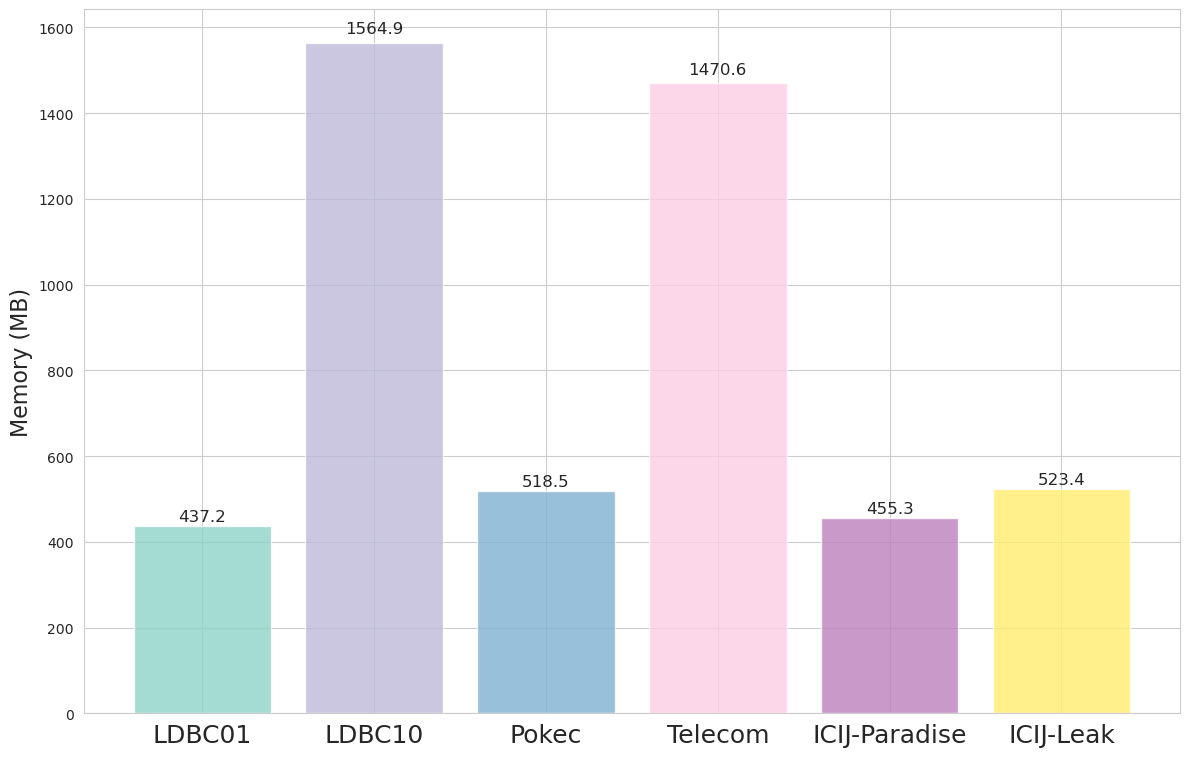

,Dataset,Max Memory,Average Memory,Median Memory,95th Percentile,Total Memory,Memory Values
0,LDBC01,437.187500,433.255208,434.375000,437.187500,25995.312500,"[424.21875, 424.53125, 424.53125, 425.0, 425.7..."
1,LDBC10,1564.867188,1540.957031,1551.429688,1564.867188,92457.421875,"[1463.4375, 1476.09375, 1476.09375, 1476.71875..."
2,Pokec,518.457031,507.479818,518.457031,518.457031,30448.789062,"[442.5, 457.65625, 457.8125, 458.59375, 458.75..."
3,Telecom,1470.625000,1329.831576,1469.972656,1469.997461,79789.894531,"[427.1875, 628.58203125, 628.58203125, 629.363..."
4,ICIJ-Paradise,455.312500,448.223958,449.609375,455.312500,26893.437500,"[434.375, 435.3125, 435.78125, 436.5625, 437.0..."
5,ICIJ-Leak,523.437500,515.046875,516.484375,523.437500,30902.812500,"[500.0, 500.9375, 501.25, 501.5625, 502.34375,..."


In [70]:
plot_dataset_memory_comparison(optimized_paths, dataset_names, "all-dataset-memory-distribution", unit='MB')

In [23]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_algorithm_comparison_by_dataset(optimized_paths, naive_paths, dataset_names, output_name, log_scale=True):
    """
    Plot comparison between optimized and naive algorithms across multiple datasets
    Split by dataset, with queries on x-axis and data constraints as lines
    
    Parameters:
    optimized_paths: list of file paths to optimized algorithm pickle files
    naive_paths: list of file paths to naive algorithm pickle files
    dataset_names: list of dataset names for subplots
    output_name: name for output file
    log_scale: whether to use log scale for y-axis
    """
    
    # Load all datasets
    optimized_data = []
    naive_data = []
    
    for path in optimized_paths:
        with open(path, "rb+") as f:
            data = pickle.loads(f.read())
            optimized_data.append(data)
    
    for path in naive_paths:
        with open(path, "rb+") as f:
            data = pickle.loads(f.read())
            naive_data.append(data)
    
    # Process all datasets
    plot_data = []
    
    # Process optimized algorithms
    for dataset_idx, (data, dataset_name) in enumerate(zip(optimized_data, dataset_names)):
        for i in range(12):  # Q1-Q12
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:  # Skip RPQ
                    id += 1
                    continue
                values = list(map(lambda x: x, data[i*6 + id][2]))
                avg_time = np.mean(values)
                plot_data.append({
                    'Algorithm': 'Optimized',
                    'Dataset': dataset_name,
                    'Query': f"Q{i+1}",
                    'Data Constraint': dtype,
                    'Average Time': avg_time,
                    'Query Number': i + 1  # Numerical value for sorting
                })
                id += 1
    
    # Process naive algorithms
    for dataset_idx, (data, dataset_name) in enumerate(zip(naive_data, dataset_names)):
        for i in range(12):  # Q1-Q12
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:  # Skip RPQ
                    id += 1
                    continue
                values = list(map(lambda x: x, data[i*6 + id][2]))
                avg_time = np.mean(values)
                plot_data.append({
                    'Algorithm': 'Naive',
                    'Dataset': dataset_name,
                    'Query': f"Q{i+1}",
                    'Data Constraint': dtype,
                    'Average Time': avg_time,
                    'Query Number': i + 1  # Numerical value for sorting
                })
                id += 1
    
    df = pd.DataFrame(plot_data)
    
    # Create subplots for each dataset
    n_datasets = len(dataset_names)
    cols = min(3, n_datasets)  # Maximum 3 columns
    rows = (n_datasets + cols - 1) // cols  # Calculate required rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    
    # If only one dataset, make axes an array for consistent indexing
    if n_datasets == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    sns.set_style("whitegrid")
    
    # Get current font sizes to calculate larger size
    current_fontsize = plt.rcParams['font.size']
    larger_fontsize = current_fontsize * 2
    
    # Define colors for data constraints
    constraint_colors = {
        'D1': 'blue',
        'D2': 'green',
        'D3': 'red',
        'D4': 'purple',
        'D5': 'orange'
    }
    
    # Define line styles for algorithms
    algorithm_styles = {'Optimized': '-', 'Naive': '--'}
    
    # Define markers for better distinction
    markers = ['o', 's', 'D', '^', 'v']
    
    # Plot each dataset in a separate subplot
    for dataset_idx, dataset_name in enumerate(dataset_names):
        if dataset_idx >= len(axes):
            break
            
        ax = axes[dataset_idx]
        dataset_df = df[df['Dataset'] == dataset_name]
        
        # Plot each algorithm and data constraint combination
        for algorithm in ['Optimized', 'Naive']:
            algorithm_df = dataset_df[dataset_df['Algorithm'] == algorithm]
            
            for constraint_idx, constraint in enumerate(["D1", "D2", "D3", "D4", "D5"]):
                constraint_algorithm_df = algorithm_df[algorithm_df['Data Constraint'] == constraint]
                
                # Sort by query number
                constraint_algorithm_df = constraint_algorithm_df.sort_values('Query Number')
                
                # Plot line
                line = ax.plot(constraint_algorithm_df['Query'], constraint_algorithm_df['Average Time'],
                             color=constraint_colors[constraint],
                             linestyle=algorithm_styles[algorithm],
                             marker=markers[constraint_idx % len(markers)],
                             markersize=5,
                             linewidth=2.5,
                             label=f'{algorithm} - {constraint}' if dataset_idx == 0 else "",
                             alpha=0.8,
                             markevery=2)  # Show every 2nd marker to reduce clutter
        
        # Set subplot title and labels
        ax.set_title(f"{dataset_name}", fontsize=larger_fontsize, fontweight='bold')
        ax.set_xlabel("")
        ax.set_ylabel("Average Time (ms)", fontsize=larger_fontsize * 0.8)
        
        # Increase tick label size
        ax.tick_params(axis='x', labelsize=larger_fontsize * 0.7)
        ax.tick_params(axis='y', labelsize=larger_fontsize * 0.7)
        
        # Rotate x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Check for log scale
        # max_time_val = dataset_df['Average Time'].max()
        # min_time_val = dataset_df[dataset_df['Average Time'] > 0]['Average Time'].min()
        # if log_scale and max_time_val > 0 and min_time_val > 0 and max_time_val / min_time_val > 100:
        #     ax.set_yscale("log")
        #     ax.set_title(f"Dataset: {dataset_name} (Log Scale)", fontsize=larger_fontsize, fontweight='bold')
        
        # Add grid for better readability
        ax.grid(True, alpha=0.3)
        
        # # Add legend to first subplot only to avoid duplication
        # if dataset_idx == 0:
        #     ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=larger_fontsize * 0.7)
    
    # Remove empty subplots if any
    for i in range(len(dataset_names), len(axes)):
        fig.delaxes(axes[i])
    
    # Create comprehensive legends outside the plots
    # Constraint legend elements
    constraint_legend_elements = []
    for constraint, color in constraint_colors.items():
        constraint_legend_elements.append(
            plt.Line2D([0], [0], color=color, linestyle='-', 
                      linewidth=3, marker='o', markersize=8, label=constraint)
        )
    
    # Algorithm legend elements
    algorithm_legend_elements = []
    for algorithm, style in algorithm_styles.items():
        algorithm_legend_elements.append(
            plt.Line2D([0], [0], color='black', linestyle=style,
                      linewidth=3, label=algorithm)
        )
    
    # Create legends
    legend1 = fig.legend(handles=constraint_legend_elements,
                        loc='upper center',
                        bbox_to_anchor=(0.3, 1.05),
                        ncol=5,
                        fontsize=larger_fontsize * 0.8,
                        title="Data Constraints",
                        title_fontsize=larger_fontsize)
    
    legend2 = fig.legend(handles=algorithm_legend_elements,
                        loc='upper center',
                        bbox_to_anchor=(0.7, 1.05),
                        ncol=2,
                        fontsize=larger_fontsize * 0.8,
                        title="Algorithms",
                        title_fontsize=larger_fontsize)
    
    # Main title
    # plt.suptitle("Algorithm Comparison: Optimized vs Naive by Dataset", 
    #             fontsize=larger_fontsize * 1.5, fontweight='bold', y=0.98)
    
    # Adjust layout to make room for legends
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    
    # Save figure
    plt.savefig(f'figure/{output_name}-algorithm-comparison-by-dataset.pdf',
               format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()



# Usage example:
# optimized_paths = ["opt1.pkl", "opt2.pkl", "opt3.pkl"]
# naive_paths = ["naive1.pkl", "naive2.pkl", "naive3.pkl"]
# dataset_names = ["Dataset1", "Dataset2", "Dataset3"]
# plot_algorithm_comparison_by_dataset(optimized_paths, naive_paths, dataset_names, "comparison", log_scale=True)

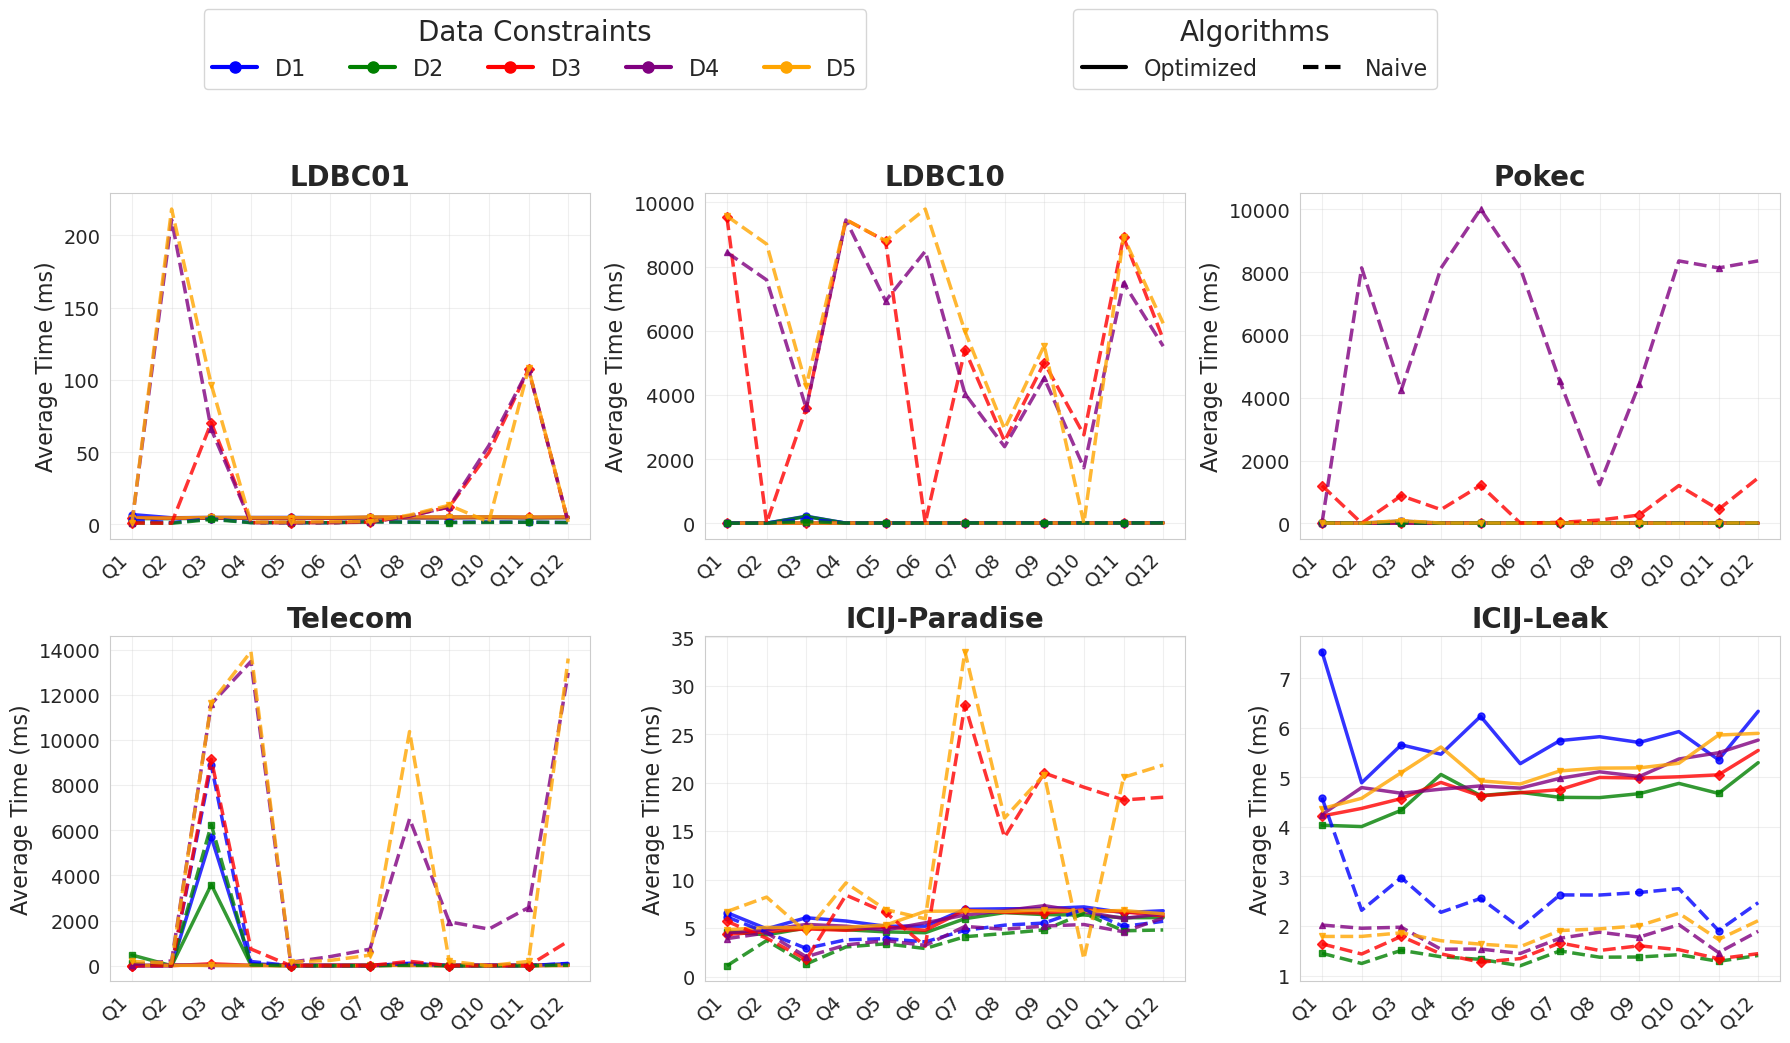

In [24]:
plot_algorithm_comparison_by_dataset(optimized_paths, naive_paths, dataset_names, "all-datasets", log_scale=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import scipy.stats as stats
from matplotlib.ticker import *
from matplotlib.cm import get_cmap
import os

def slice_small_log(path):
    f = open(path, "rb+") 
    count = 0 
    res = []
    d = {}
    for qi in range(12):
        d[f"Q{qi+1}"] = {}
    for line in f:
        if "exploration_depth" in line.decode('utf-8'):
            res.append(int(line.decode('utf-8').split(":")[1].strip()))
    for i in range(12):
        for j in range(5):
            d[f"Q{i+1}"][f"D{j+1}"] = res[i*500 + j*100: i*500 + (j+1)*100]
    return d

def load_running_time_data(path, dataset_name):
    """Load running time data from pickle file"""
    with open(path, "rb+") as f:
        data = pickle.loads(f.read())
    
    time_data = {}
    for i in range(12):  # Q1-Q12
        query_key = f"Q{i+1}"
        time_data[query_key] = {}
        
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
            if id == 0:  # Skip RPQ
                id += 1
                continue
            values = list(map(lambda x: x, data[i*6 + id][2]))
            time_data[query_key][dtype] = values
            id += 1
    
    return time_data

def prepare_raw_data(cardinality_data, runtime_data, dataset_name):
    """Prepare raw data points without statistics"""
    plot_data = []
    
    constraints = ['D1', 'D2', 'D3', 'D4', 'D5']
    
    for query_key in cardinality_data.keys():
        for constraint in constraints:
            if (constraint in cardinality_data[query_key] and 
                constraint in runtime_data[query_key]):
                
                # Get all individual data points
                cardinality_points = cardinality_data[query_key][constraint]
                runtime_points = runtime_data[query_key][constraint]
                
                # Make sure we have the same number of points
                min_length = min(len(cardinality_points), len(runtime_points))
                
                for i in range(min_length):
                    plot_data.append({
                        'dataset': dataset_name,
                        'query': query_key,
                        'constraint': constraint,
                        'cardinality': cardinality_points[i],
                        'runtime': runtime_points[i]
                    })
    
    return pd.DataFrame(plot_data)

def plot_individual_dataset_raw(df, dataset_name, log_scale=False):
    """Create raw scatter plot for an individual dataset"""
    
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # Get unique constraints for coloring
    constraints = df['constraint'].unique()
    colors = plt.cm.Set2(np.linspace(0, 1, len(constraints)))
    color_map = {constraint: color for constraint, color in zip(constraints, colors)}
    
    # Plot each constraint with different color
    for constraint in constraints:
        constraint_df = df[df['constraint'] == constraint]
        ax.scatter(constraint_df['cardinality'], constraint_df['runtime'], 
                  color="grey", s=40, alpha=0.6, 
                  edgecolors='none', label=f'Constraint {constraint}')
    
    # Calculate and display correlation coefficient
    if not df.empty:
        # correlation = np.corrcoef(df['cardinality'], df['runtime'])[0, 1]
        correlation, p = stats.pearsonr(df['cardinality'], df['runtime'])[0:2]
        ax.text(0.05, 0.88, f'Correlation: {correlation:.3f}', 
               transform=ax.transAxes, fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
        
        # Add number of data points
        ax.text(0.05, 0.88, f'Data points: {len(df):,}', 
               transform=ax.transAxes, fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    # Add trend line
    if not df.empty:
        z = np.polyfit(df['cardinality'], df['runtime'], 1)
        p = np.poly1d(z)
        x_range = np.linspace(df['cardinality'].min(), df['cardinality'].max(), 100)
        ax.plot(x_range, p(x_range), 'black', linestyle='-', 
               linewidth=2, alpha=0.8, label='Trend line')
    
    # Set labels and title
    ax.set_xlabel('Cardinality (Exploration Depth)', fontsize=14)
    ax.set_ylabel('Runtime (ms)', fontsize=14)
    ax.set_title(f'Cardinality vs Runtime - {dataset_name}', fontsize=16, pad=20)
    
    if log_scale:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    # Add grid and legend
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=10)
    
    # Save figure
    os.makedirs('figure/individual', exist_ok=True)
    fig.savefig(f'figure/individual/{dataset_name}_cardinality_vs_runtime_raw.pdf', 
                bbox_inches='tight', dpi=300)
    
    plt.close(fig)
    
    return correlation

def plot_merged_datasets_raw(all_dfs, log_scale=False):
    """Create merged raw scatter plot across all datasets"""
    
    # Combine all datasets
    merged_df = pd.concat(all_dfs.values(), ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Get unique datasets for coloring
    datasets = merged_df['dataset'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))
    color_map = {dataset: color for dataset, color in zip(datasets, colors)}
    
    # Plot each dataset with different color
    for dataset in datasets:
        dataset_df = merged_df[merged_df['dataset'] == dataset]
        ax.scatter(dataset_df['cardinality'], dataset_df['runtime'], 
                  color="grey", s=30, alpha=0.5, 
                  edgecolors='none', label=dataset)
    
    # Calculate and display correlation coefficient
    if not merged_df.empty:
        correlation = np.corrcoef(merged_df['cardinality'], merged_df['runtime'])[0, 1]
        ax.text(0.05, 0.88, f'Correlation: {correlation:.3f}', 
               transform=ax.transAxes, fontsize=40)
        
        # Add number of data points
        # ax.text(0.05, 0.88, f'Data points: {len(merged_df):,}', 
        #        transform=ax.transAxes, fontsize=10,
        #        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    # Add trend line
    if not merged_df.empty:
        z = np.polyfit(merged_df['cardinality'], merged_df['runtime'], 2)
        p = np.poly1d(z)
        x_range = np.linspace(merged_df['cardinality'].min(), merged_df['cardinality'].max(), 100)
        ax.plot(x_range, p(x_range), 'black', linestyle='-', 
               linewidth=3, alpha=0.8, label='Overall trend')
    
    # Set labels and title
    ax.set_xlabel('Oracle Query Counts', fontsize=40)
    ax.set_ylabel('Runtime (ms)', fontsize=40)
    ax.tick_params(axis='x', labelsize=40)
    ax.tick_params(axis='y', labelsize=40)
    # ax.set_title('Cardinality vs Runtime (All Datasets)', fontsize=16, pad=20)
    
    if log_scale:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    # Add grid and legend
    ax.grid(True, alpha=0.3, linestyle='--')
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legends = [
        Patch([0], [0], hatch='O', color='grey', label="Individual Run",
               alpha=0.5, linestyle='None'),
        Line2D([0], [0], color='black', lw=3, label='Overall Trend') 
    ]
    ax.legend(handles=legends, fontsize=40, loc='upper left', bbox_to_anchor=(1.05, 1))

    # Save figure
    os.makedirs('figure/merged', exist_ok=True)
    fig.savefig('figure/merged/merged_cardinality_vs_runtime_raw.pdf', 
                bbox_inches='tight', dpi=300)
    
    plt.show()
    
    return merged_df, correlation

def print_correlation_summary(correlation_results):
    """Print summary of correlation coefficients"""
    print("\n" + "="*50)
    print("CORRELATION SUMMARY - RAW DATA POINTS")
    print("="*50)
    
    # Create table header
    print(f"{'Dataset':<15} {'Correlation':<12} {'Data Points':<12}")
    print("-" * 40)
    
    # Print each dataset's correlation
    for dataset, (correlation, data_points) in correlation_results.items():
        print(f"{dataset:<15} {correlation:.4f}      {data_points:,}")
    
    # Calculate average correlation
    avg_correlation = np.mean([corr for corr, _ in correlation_results.values()])
    total_points = sum([points for _, points in correlation_results.values()])
    
    print("-" * 40)
    print(f"{'Average':<15} {avg_correlation:.4f}      {total_points:,}")
    print("="*50)

def plot_all_datasets_raw(cardinality_paths, runtime_paths, log_scale=False):
    """
    Plot raw scatter plots between cardinality and runtime for each dataset
    and then merged together
    
    Parameters:
    -----------
    cardinality_paths : dict
        Dictionary of {dataset_name: cardinality_file_path}
    runtime_paths : dict
        Dictionary of {dataset_name: runtime_file_path}
    log_scale : bool
        Whether to use logarithmic scale
    """
    
    all_dfs = {}
    correlation_results = {}
    
    print("Processing individual datasets (raw data points)...")
    for dataset_name in cardinality_paths.keys():
        if dataset_name in runtime_paths:
            print(f"  Analyzing {dataset_name}...")
            
            # Load data
            cardinality_data = slice_small_log(cardinality_paths[dataset_name])
            runtime_data = load_running_time_data(runtime_paths[dataset_name], dataset_name)
            
            # Prepare raw data
            df = prepare_raw_data(cardinality_data, runtime_data, dataset_name)
            all_dfs[dataset_name] = df
            
            # Plot individual dataset
            correlation = plot_individual_dataset_raw(df, dataset_name, log_scale)
            correlation_results[dataset_name] = (correlation, len(df))
            
            print(f"    {dataset_name}: {len(df):,} data points, correlation: {correlation:.3f}")
    
    # Print correlation summary
    print_correlation_summary(correlation_results)
    
    # Plot merged datasets
    print("\nCreating merged raw plot...")
    merged_df, merged_correlation = plot_merged_datasets_raw(all_dfs, log_scale)
    
    print(f"\nTotal data points across all datasets: {len(merged_df):,}")
    print(f"Overall correlation: {merged_correlation:.3f}")
    print("Analysis complete! Check the 'figure/' directory for plots.")

# Example usage:
# cardinality_paths = {
#     "DBPedia": "path/to/dbpedia_cardinality.log",
#     "YAGO": "path/to/yago_cardinality.log",
#     "Wikidata": "path/to/wikidata_cardinality.log"
# }
#
# runtime_paths = {
#     "DBPedia": "path/to/dbpedia_runtime.pkl",
#     "YAGO": "path/to/yago_runtime.pkl",
#     "Wikidata": "path/to/wikidata_runtime.pkl"
# }
#
# plot_all_datasets_raw(cardinality_paths, runtime_paths, log_scale=True)

Processing individual datasets (raw data points)...
  Analyzing LDBC10...
    LDBC10: 6,000 data points, correlation: -0.008
  Analyzing LDBC01...
    LDBC01: 6,000 data points, correlation: 0.111
  Analyzing Pokec...
    Pokec: 6,000 data points, correlation: 0.959
  Analyzing Telecom...
    Telecom: 6,000 data points, correlation: 0.966
  Analyzing ICIJ-Leak...
    ICIJ-Leak: 6,000 data points, correlation: 0.054
  Analyzing ICIJ-Paradise...
    ICIJ-Paradise: 6,000 data points, correlation: -0.015

CORRELATION SUMMARY - RAW DATA POINTS
Dataset         Correlation  Data Points 
----------------------------------------
LDBC10          -0.0081      6,000
LDBC01          0.1115      6,000
Pokec           0.9586      6,000
Telecom         0.9661      6,000
ICIJ-Leak       0.0544      6,000
ICIJ-Paradise   -0.0155      6,000
----------------------------------------
Average         0.3445      36,000

Creating merged raw plot...


/tmp/ipykernel_21490/2208521057.py:188: MatplotlibDeprecationWarning: Passing the edgecolor parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  Patch([0], [0], hatch='O', color='grey', label="Individual Run",
/tmp/ipykernel_21490/2208521057.py:188: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch([0], [0], hatch='O', color='grey', label="Individual Run",


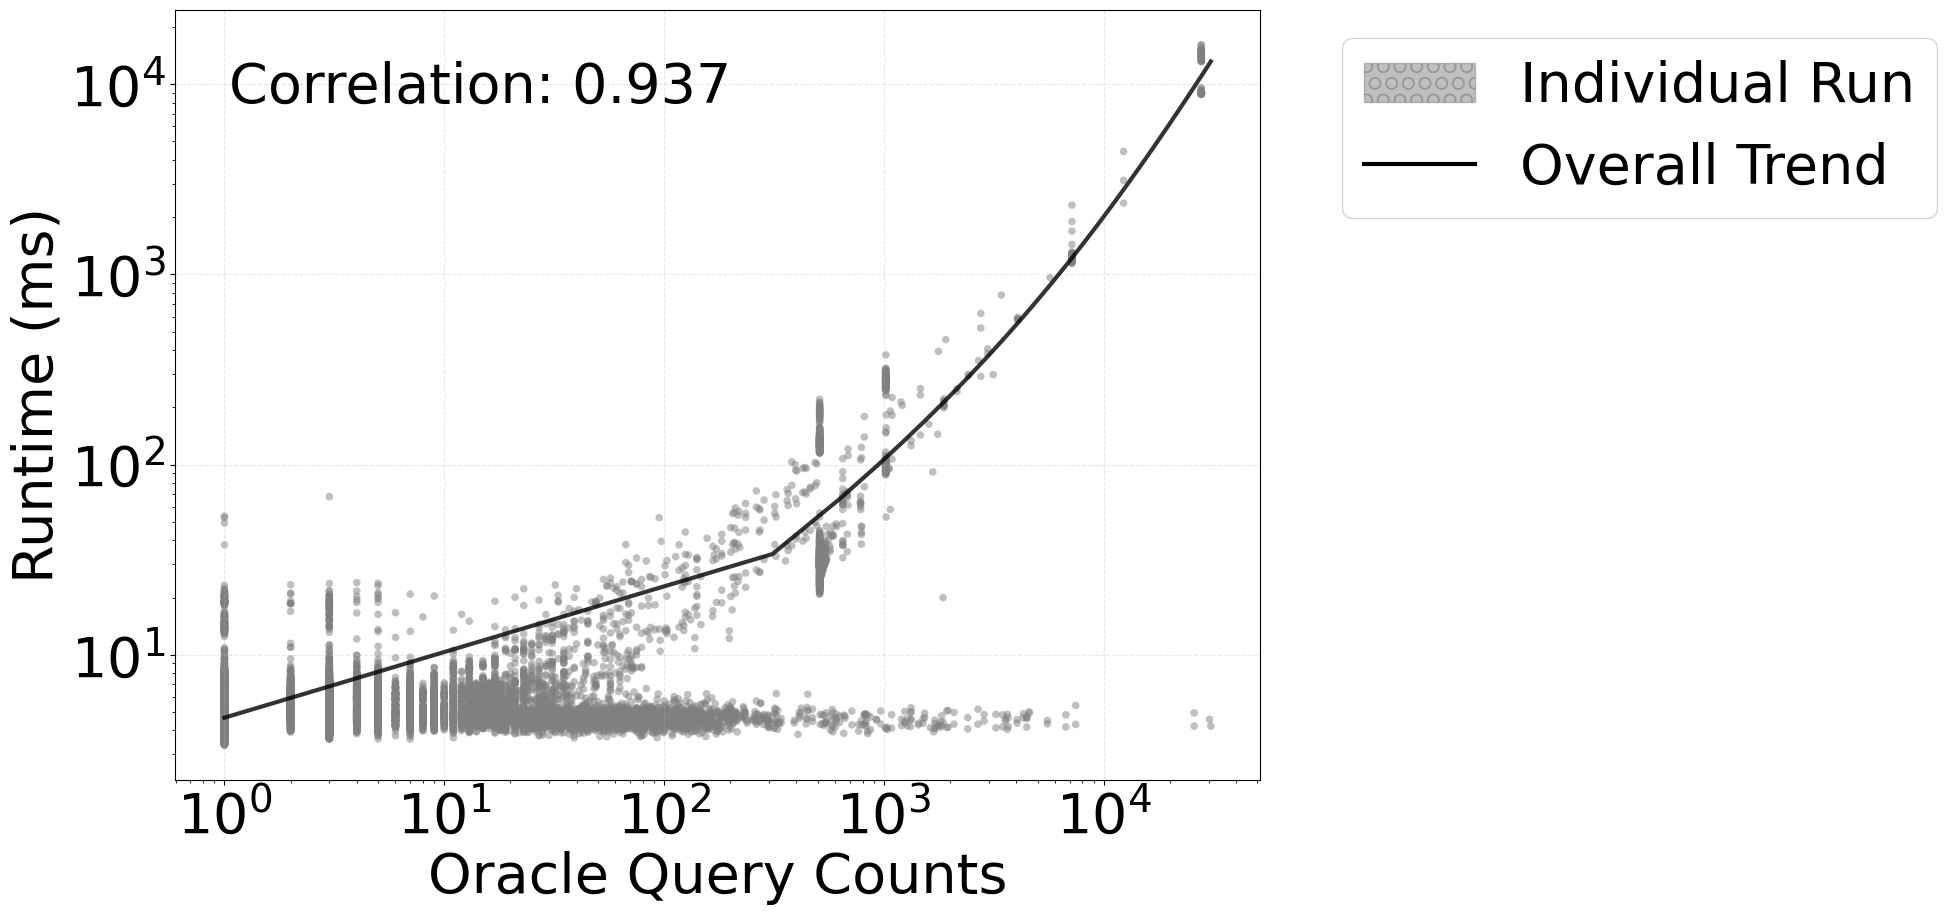


Total data points across all datasets: 36,000
Overall correlation: 0.937
Analysis complete! Check the 'figure/' directory for plots.


In [65]:
dataset_paths = {
        "LDBC10": "ldbc10/z3_debug.log",
        "LDBC01": "ldbc01/z3_debug.log", 
        "Pokec": "pokec/z3_debug.log",
        "Telecom": "telecom/z3_debug.log",
        "ICIJ-Leak": "icij-leak/z3_debug.log",
        "ICIJ-Paradise": "paradise/z3_debug.log"
    }
    
optimized_paths = {"LDBC10":"ldbc01/ldbc01_statistic.pkl", 
         "LDBC01":"ldbc01/ldbc01_statistic.pkl", 
         "Pokec":"pokec/pokec_statistic.pkl",
         "Telecom":"telecom/telecom_statistic.pkl",
         "ICIJ-Leak":"icij-leak/icij_leak_statistic.pkl",
         "ICIJ-Paradise":"paradise/icij_paradise_statistic.pkl"}

dataset_stat ={
            "LDBC10": (30000000, 178000000),
        "LDBC01": (180000, 1500000), 
        "Pokec": (1600000, 30600000),
        "Telecom": (170000, 50000000),
        "ICIJ-Leak": (1900000, 3200000),
        "ICIJ-Paradise": (163000, 364000)
}
    # Plot comparison
plot_all_datasets_raw(dataset_paths, optimized_paths,  log_scale=True)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from matplotlib.ticker import *
from matplotlib.cm import get_cmap
import os

def slice_small_log(path):
    f = open(path, "rb+") 
    count = 0 
    res = []
    d = {}
    for qi in range(12):
        d[f"Q{qi+1}"] = {}
    for line in f:
        if "exploration_depth" in line.decode('utf-8'):
            res.append(int(line.decode('utf-8').split(":")[1].strip()))
    for i in range(12):
        for j in range(5):
            d[f"Q{i+1}"][f"D{j+1}"] = res[i*500 + j*100: i*500 + (j+1)*100]
    return d

def load_running_time_data(path, dataset_name):
    """Load running time data from pickle file"""
    with open(path, "rb+") as f:
        data = pickle.loads(f.read())
    
    time_data = {}
    for i in range(12):  # Q1-Q12
        query_key = f"Q{i+1}"
        time_data[query_key] = {}
        
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
            if id == 0:  # Skip RPQ
                id += 1
                continue
            values = list(map(lambda x: x, data[i*6 + id][2]))
            time_data[query_key][dtype] = values
            id += 1
    
    return time_data

def compute_top_25_percentile_runtime(runtime_data):
    """Compute the 75th percentile (top 25%) runtime for each query and constraint"""
    top_25_stats = {}
    
    for query_key, query_data in runtime_data.items():
        top_25_stats[query_key] = {}
        
        for constraint, values in query_data.items():
            if values:
                # 75th percentile represents the top 25% of running times
                top_25_stats[query_key][constraint] = np.percentile(values, 75)
            else:
                top_25_stats[query_key][constraint] = 0
    
    return top_25_stats

def classify_queries():
    """Define query complexity classifications"""
    return {
        'simple_regular': ['Q1', 'Q2', 'Q4', 'Q7', 'Q11'],
        'medium_regular': ['Q5', 'Q6', 'Q9', 'Q10'],
        'complex_regular': ['Q3', 'Q8', 'Q12'],
        'simple_data': ['D1', 'D2'],
        'complex_data': ['D3', 'D4', 'D5']
    }

def prepare_aggregated_data(runtime_data, dataset_name, graph_stats):
    """Prepare aggregated top 25% runtime data by complexity categories"""
    top_25_stats = compute_top_25_percentile_runtime(runtime_data)
    query_classes = classify_queries()
    
    V, E = graph_stats
    V_plus_E = V + E
    E_over_V = E / V if V > 0 else 0
    
    aggregated_data = []
    
    # Aggregate by data constraint complexity
    for data_complexity in ['simple_data', 'complex_data']:
        constraints = query_classes[data_complexity]
        runtimes = []
        
        for query_key in top_25_stats.keys():
            for constraint in constraints:
                if constraint in top_25_stats[query_key]:
                    runtimes.append(top_25_stats[query_key][constraint])
        
        if runtimes:
            aggregated_data.append({
                'dataset': dataset_name,
                'category': data_complexity,
                'subcategory': 'all',
                'avg_top_25_runtime': np.mean(runtimes),
                'median_top_25_runtime': np.median(runtimes),
                'V_plus_E': V_plus_E,
                'E_over_V': E_over_V,
                'V': V,
                'E': E,
                'n_points': len(runtimes)
            })
    
    # Aggregate by regular query complexity
    for reg_complexity in ['simple_regular', 'medium_regular', 'complex_regular']:
        queries = query_classes[reg_complexity]
        runtimes = []
        
        for query_key in queries:
            if query_key in top_25_stats:
                for constraint in top_25_stats[query_key].keys():
                    runtimes.append(top_25_stats[query_key][constraint])
        
        if runtimes:
            aggregated_data.append({
                'dataset': dataset_name,
                'category': 'regular_query',
                'subcategory': reg_complexity,
                'avg_top_25_runtime': np.mean(runtimes),
                'median_top_25_runtime': np.median(runtimes),
                'V_plus_E': V_plus_E,
                'E_over_V': E_over_V,
                'V': V,
                'E': E,
                'n_points': len(runtimes)
            })
    
    # Aggregate by combined complexity (data + query)
    for reg_complexity in ['simple_regular', 'medium_regular', 'complex_regular']:
        for data_complexity in ['simple_data', 'complex_data']:
            queries = query_classes[reg_complexity]
            constraints = query_classes[data_complexity]
            runtimes = []
            
            for query_key in queries:
                if query_key in top_25_stats:
                    for constraint in constraints:
                        if constraint in top_25_stats[query_key]:
                            runtimes.append(top_25_stats[query_key][constraint])
            
            if runtimes:
                aggregated_data.append({
                    'dataset': dataset_name,
                    'category': 'combined',
                    'subcategory': f'{reg_complexity}_{data_complexity}',
                    'avg_top_25_runtime': np.mean(runtimes),
                    'median_top_25_runtime': np.median(runtimes),
                    'V_plus_E': V_plus_E,
                    'E_over_V': E_over_V,
                    'V': V,
                    'E': E,
                    'n_points': len(runtimes)
                })
    
    return pd.DataFrame(aggregated_data)

def compute_aggregated_correlations(all_aggregated_data):
    """Compute correlation coefficients for each complexity category"""
    
    correlations = {}
    
    # Combine all datasets
    merged_df = pd.concat(all_aggregated_data.values(), ignore_index=True)
    
    if merged_df.empty:
        return correlations, merged_df
    
    # Define metrics to analyze
    metrics = ['V_plus_E', 'E_over_V', 'V', 'E']
    runtime_metrics = ['avg_top_25_runtime', 'median_top_25_runtime']
    
    # Compute correlations for each category and subcategory
    categories = merged_df['category'].unique()
    
    for category in categories:
        category_df = merged_df[merged_df['category'] == category]
        correlations[category] = {}
        
        for runtime_metric in runtime_metrics:
            correlations[category][runtime_metric] = {}
            
            for graph_metric in metrics:
                valid_data = category_df[[runtime_metric, graph_metric]].dropna()
                if len(valid_data) > 1:
                    corr = np.corrcoef(valid_data[runtime_metric], valid_data[graph_metric])[0, 1]
                    correlations[category][runtime_metric][graph_metric] = corr
                else:
                    correlations[category][runtime_metric][graph_metric] = np.nan
    
    return correlations, merged_df

def plot_aggregated_correlations(merged_df, correlations):
    """Create visualizations for aggregated correlation analysis"""
    
    os.makedirs('figure/aggregated_correlation', exist_ok=True)
    
    # Plot for each complexity category
    categories = ['simple_data', 'complex_data', 'regular_query', 'combined']
    metrics = ['V_plus_E', 'E_over_V']
    runtime_metric = 'avg_top_25_runtime'
    
    for category in categories:
        if category in correlations and runtime_metric in correlations[category]:
            category_df = merged_df[merged_df['category'] == category]
            
            if len(category_df) > 0:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
                
                # Plot 1: vs |V| + |E|
                plot_aggregated_scatter(ax1, category_df, 'V_plus_E', runtime_metric,
                                      '|V| + |E|', 'Avg Top 25% Runtime (ms)',
                                      f'{category.replace("_", " ").title()} - vs Graph Size')
                
                # Plot 2: vs |E|/|V|
                plot_aggregated_scatter(ax2, category_df, 'E_over_V', runtime_metric,
                                      '|E| / |V|', 'Avg Top 25% Runtime (ms)',
                                      f'{category.replace("_", " ").title()} - vs Connectivity')
                
                plt.tight_layout()
                plt.savefig(f'figure/aggregated_correlation/{category}_correlation.pdf', 
                           bbox_inches='tight', dpi=300)
                plt.close(fig)

def plot_aggregated_scatter(ax, df, x_col, y_col, x_label, y_label, title):
    """Create scatter plot for aggregated data"""
    
    # Get unique datasets for coloring
    datasets = df['dataset'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))
    color_map = {dataset: color for dataset, color in zip(datasets, colors)}
    
    # Plot each dataset
    for dataset in datasets:
        dataset_df = df[df['dataset'] == dataset]
        ax.scatter(dataset_df[x_col], dataset_df[y_col], 
                  color=color_map[dataset], s=100, alpha=0.8, 
                  edgecolors='black', label=dataset)
        
        # Add dataset labels
        for _, row in dataset_df.iterrows():
            ax.annotate(dataset, (row[x_col], row[y_col]),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, alpha=0.7)
    
    # Add trend line if enough points
    if len(df) > 1:
        z = np.polyfit(df[x_col], df[y_col], 1)
        p = np.poly1d(z)
        x_range = np.linspace(df[x_col].min(), df[x_col].max(), 100)
        ax.plot(x_range, p(x_range), 'black', linestyle='--', 
               linewidth=2, alpha=0.8)
    
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=14, pad=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

def print_detailed_correlation_summary(correlations, merged_df):
    """Print comprehensive correlation summary"""
    
    print("\n" + "="*100)
    print("AGGREGATED CORRELATION ANALYSIS: Top 25% Runtime vs Graph Metrics")
    print("="*100)
    
    categories = ['simple_data', 'complex_data', 'regular_query', 'combined']
    metrics = ['V_plus_E', 'E_over_V', 'V', 'E']
    runtime_metrics = ['avg_top_25_runtime', 'median_top_25_runtime']
    
    for category in categories:
        if category in correlations:
            print(f"\n{category.replace('_', ' ').upper():<20}")
            print("-" * 60)
            
            for runtime_metric in runtime_metrics:
                if runtime_metric in correlations[category]:
                    print(f"  {runtime_metric.replace('_', ' ').title():<25}")
                    for graph_metric in metrics:
                        if graph_metric in correlations[category][runtime_metric]:
                            corr = correlations[category][runtime_metric][graph_metric]
                            if not np.isnan(corr):
                                interpretation = interpret_correlation(corr)
                                direction = "positive" if corr > 0 else "negative"
                                print(f"    {graph_metric:<15} {corr:>8.4f}  ({interpretation} {direction})")
    
    # Print dataset statistics
    print(f"\n{'DATASET STATISTICS':<20}")
    print("-" * 60)
    print(f"Total datasets: {merged_df['dataset'].nunique()}")
    print(f"Total data points: {len(merged_df)}")
    
    # Print category statistics
    for category in categories:
        category_count = len(merged_df[merged_df['category'] == category])
        print(f"{category.replace('_', ' ').title():<20} {category_count:>8} points")
    
    print("="*100)

def interpret_correlation(corr):
    """Interpret correlation strength"""
    abs_corr = abs(corr)
    if abs_corr >= 0.7:
        return "Strong"
    elif abs_corr >= 0.5:
        return "Moderate"
    elif abs_corr >= 0.3:
        return "Weak"
    else:
        return "Very weak"

def analyze_aggregated_top_25_correlation(cardinality_paths, runtime_paths, graph_stats_dict):
    """
    Analyze correlation between top 25% runtime and graph metrics with aggregation
    by query complexity categories
    """
    
    all_aggregated_data = {}
    
    print("Analyzing aggregated correlation by query complexity categories...")
    
    for dataset_name in runtime_paths.keys():
        if dataset_name in graph_stats_dict:
            print(f"  Processing {dataset_name}...")
            
            # Load runtime data
            runtime_data = load_running_time_data(runtime_paths[dataset_name], dataset_name)
            
            # Get graph statistics
            graph_stats = graph_stats_dict[dataset_name]
            
            # Prepare aggregated data
            aggregated_df = prepare_aggregated_data(runtime_data, dataset_name, graph_stats)
            all_aggregated_data[dataset_name] = aggregated_df
            
            print(f"    {dataset_name}: {len(aggregated_df)} aggregated categories")
    
    # Compute correlation coefficients
    correlations, merged_df = compute_aggregated_correlations(all_aggregated_data)
    
    if correlations:
        # Create visualizations
        plot_aggregated_correlations(merged_df, correlations)
        
        # Print detailed summary
        print_detailed_correlation_summary(correlations, merged_df)
        
        # Additional analysis: Export detailed data for further analysis
        merged_df.to_csv('figure/aggregated_correlation/aggregated_correlation_data.csv', index=False)
        print("\nDetailed data exported to: figure/aggregated_correlation/aggregated_correlation_data.csv")
        
    else:
        print("No valid data for aggregated correlation analysis")

# Example usage:
# cardinality_paths = {
#     "DBPedia": "path/to/dbpedia_cardinality.log",
#     "YAGO": "path/to/yago_cardinality.log",
#     "Wikidata": "path/to/wikidata_cardinality.log"
# }
#
# runtime_paths = {
#     "DBPedia": "path/to/dbpedia_runtime.pkl",
#     "YAGO": "path/to/yago_runtime.pkl",
#     "Wikidata": "path/to/wikidata_runtime.pkl"
# }
#
# graph_stats_dict = {
#     "DBPedia": (10000000, 150000000),
#     "YAGO": (5000000, 80000000),
#     "Wikidata": (20000000, 300000000)
# }
#
# analyze_aggregated_top_25_correlation(cardinality_paths, runtime_paths, graph_stats_dict)

In [21]:
analyze_aggregated_top_25_correlation(dataset_paths, optimized_paths, dataset_stat)

Analyzing aggregated correlation by query complexity categories...
  Processing LDBC10...
    LDBC10: 11 aggregated categories
  Processing LDBC01...
    LDBC01: 11 aggregated categories
  Processing Pokec...
    Pokec: 11 aggregated categories
  Processing Telecom...
    Telecom: 11 aggregated categories
  Processing ICIJ-Leak...
    ICIJ-Leak: 11 aggregated categories
  Processing ICIJ-Paradise...
    ICIJ-Paradise: 11 aggregated categories

AGGREGATED CORRELATION ANALYSIS: Top 25% Runtime vs Graph Metrics

SIMPLE DATA         
------------------------------------------------------------
  Avg Top 25 Runtime       
    V_plus_E          0.0024  (Very weak positive)
    E_over_V          0.9987  (Strong positive)
    V                -0.2269  (Very weak negative)
    E                 0.0423  (Very weak positive)
  Median Top 25 Runtime    
    V_plus_E         -0.4240  (Weak negative)
    E_over_V          0.4647  (Weak positive)
    V                -0.5557  (Moderate negative)
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from plt.Line2D import Line2D
from 

def visualize_aggregated_correlation(csv_path):
    """
    Visualize the aggregated correlation data from CSV file
    """
    
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    print(f"Loaded data with {len(df)} rows")
    print(f"Columns: {list(df.columns)}")
    print(f"\nDataset names: {df['dataset'].unique()}")
    print(f"Categories: {df['category'].unique()}")
    print(f"Subcategories: {df['subcategory'].unique()}")
    
    # Create output directory
    os.makedirs('figure/csv_visualization', exist_ok=True)
    
    # 1. Basic summary statistics
    print("\n=== SUMMARY STATISTICS ===")
    print(df.groupby(['category', 'subcategory']).agg({
        'avg_top_25_runtime': ['mean', 'std', 'count'],
        'median_top_25_runtime': ['mean', 'std']
    }).round(2))
    
    # 2. Correlation heatmap for each category
    plot_correlation_heatmaps(df)
    
    # 3. Scatter plots by category
    plot_scatter_by_category(df)
    
    # 4. Comparison across datasets
    plot_dataset_comparison(df)
    
    # 5. Runtime distribution by complexity
    plot_runtime_distribution(df)

def plot_correlation_heatmaps(df):
    """Plot correlation heatmaps for different categories"""
    
    categories = df['category'].unique()
    metrics = ['V_plus_E', 'E_over_V', 'V', 'E']
    runtime_metrics = ['avg_top_25_runtime', 'median_top_25_runtime']
    
    for category in categories:
        category_df = df[df['category'] == category]
        
        if len(category_df) > 1:
            # Compute correlation matrix
            corr_matrix = category_df[metrics + runtime_metrics].corr()
            
            # Plot heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                       square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
            plt.title(f'Correlation Matrix - {category}', fontsize=14, pad=20)
            plt.tight_layout()
            plt.savefig(f'figure/csv_visualization/{category}_correlation_heatmap.png', 
                       bbox_inches='tight', dpi=300)
            plt.close()

def plot_scatter_by_category(df):
    """Create scatter plots for each category"""
    
    categories = df['category'].unique()
    
    for category in categories:
        category_df = df[df['category'] == category]
        
        if len(category_df) > 0:
            fig, axes = plt.subplots(2, 2, figsize=(15, 12))
            axes = axes.flatten()
            
            # Plot against different metrics
            metrics = [
                ('V_plus_E', '|V| + |E| (Graph Size)'),
                ('E_over_V', '|E| / |V| (Connectivity)'),
                ('V', '|V| (Number of Vertices)'),
                ('E', '|E| (Number of Edges)')
            ]
            
            for idx, (metric, label) in enumerate(metrics):
                ax = axes[idx]
                
                # Color by dataset
                datasets = category_df['dataset'].unique()
                colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))
                
                for i, dataset in enumerate(datasets):
                    dataset_df = category_df[category_df['dataset'] == dataset]
                    ax.scatter(dataset_df[metric], dataset_df['avg_top_25_runtime'],
                             color=colors[i], s=100, alpha=0.8, label=dataset)
                
                ax.set_xlabel(label, fontsize=12)
                ax.set_ylabel('Average Top 25% Runtime (ms)', fontsize=12)
                ax.set_title(f'{category} - vs {label}', fontsize=14)
                ax.grid(True, alpha=0.3)
                
                if idx == 0:  # Only show legend on first plot
                    ax.legend(fontsize=9)
            
            plt.suptitle(f'Runtime vs Graph Metrics - {category}', fontsize=16, y=0.98)
            plt.tight_layout()
            plt.savefig(f'figure/csv_visualization/{category}_scatter_plots.png',
                       bbox_inches='tight', dpi=300)
            plt.close()

def plot_dataset_comparison(df):
    """Compare runtime across datasets for each category"""
    
    categories = df['category'].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(16x_inches='tight', dpi=300)
    
    plt.close(fig)
    
    return correlation, 12))
    axes = axes.flatten()
    
    for idx, category in enumerate(categories[:4]):  # Limit to first 4 categories
        if idx < len(axes):
            ax = axes[idx]
            category_df = df[df['category'] == category]
            
            # Create box plot
            sns.boxplot(data=category_df, x='dataset', y='avg_top_25_runtime', ax=ax)
            ax.set_xlabel('Dataset', fontsize=12)
            ax.set_ylabel('Average Top 25% Runtime (ms)', fontsize=12)
            ax.set_title(f'Runtime Distribution - {category}', fontsize=14)
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True, alpha=0.3)
    
    plt.suptitle('Runtime Comparison Across Datasets by Category', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.savefig('figure/csv_visualization/dataset_comparison.png',
               bbox_inches='tight', dpi=300)
    plt.close()

def plot_runtime_distribution(df):
    """Plot runtime distribution by complexity level"""
    
    # Group by category and calculate statistics
    runtime_stats = df.groupby('category')['avg_top_25_runtime'].agg([
        'mean', 'std', 'count', 'min', 'max'
    ]).round(2)
    
    print("\n=== RUNTIME STATISTICS BY CATEGORY ===")
    print(runtime_stats)
    
    # Bar plot of average runtime by category
    plt.figure(figsize=(12, 8))
    categories = runtime_stats.index
    means = runtime_stats['mean']
    stds = runtime_stats['std']
    
    bars = plt.bar(range(len(categories)), means, yerr=stds, 
                  capsize=5, alpha=0.7, color='skyblue', edgecolor='black')
    
    plt.xlabel('Complexity Category', fontsize=12)
    plt.ylabel('Average Top 25% Runtime (ms)', fontsize=12)
    plt.title('Average Runtime by Complexity Category', fontsize=14)
    plt.xticks(range(len(categories)), [cat.replace('_', '\n') for cat in categories], fontsize=10)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{means[i]:.1f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('figure/csv_visualization/runtime_by_category.png',
               bbox_inches='tight', dpi=300)
    plt.close()

def quick_summary(csv_path):
    """Quick summary of the CSV data"""
    
    df = pd.read_csv(csv_path)
    
    print("=== QUICK SUMMARY ===")
    print(f"Total rows: {len(df)}")
    print(f"Datasets: {', '.join(df['dataset'].unique())}")
    print(f"Categories: {', '.join(df['category'].unique())}")
    
    # Top 5 rows
    print("\n=== FIRST 5 ROWS ===")
    print(df.head())
    
    # Basic statistics
    print("\n=== BASIC STATS ===")
    print(df.describe().round(2))

# Example usage:
if __name__ == "__main__":
    csv_path = "figure/aggregated_correlation/aggregated_correlation_data.csv"
    
    # Check if file exists
    if os.path.exists(csv_path):
        print(f"Found CSV file: {csv_path}")
        visualize_aggregated_correlation(csv_path)
        print("\nVisualization complete! Check 'figure/csv_visualization/' directory")
    else:
        print(f"CSV file not found: {csv_path}")
        print("Please run the aggregation analysis first to generate the CSV file.")
        
    # For quick look without full visualization
    # quick_summary(csv_path)

Found CSV file: figure/aggregated_correlation/aggregated_correlation_data.csv
Loaded data with 66 rows
Columns: ['dataset', 'category', 'subcategory', 'avg_top_25_runtime', 'median_top_25_runtime', 'V_plus_E', 'E_over_V', 'V', 'E', 'n_points']

Dataset names: ['LDBC10' 'LDBC01' 'Pokec' 'Telecom' 'ICIJ-Leak' 'ICIJ-Paradise']
Categories: ['simple_data' 'complex_data' 'regular_query' 'combined']
Subcategories: ['all' 'simple_regular' 'medium_regular' 'complex_regular'
 'simple_regular_simple_data' 'simple_regular_complex_data'
 'medium_regular_simple_data' 'medium_regular_complex_data'
 'complex_regular_simple_data' 'complex_regular_complex_data']

=== SUMMARY STATISTICS ===
                                           avg_top_25_runtime                 \
                                                         mean      std count   
category      subcategory                                                      
combined      complex_regular_complex_data              11.90    13.38     6   

/tmp/ipykernel_21490/925856042.py:170: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{means[i]:.1f}', ha='center', va='bottom', fontsize=10)



Visualization complete! Check 'figure/csv_visualization/' directory
